# Libraries 

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import preprocessing,svm
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import re
import scipy
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import precision_recall_fscore_support
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Data Reading

In [2]:
main_data=pd.read_excel('our_data/mydata.xlsx')
YI1=pd.read_excel('our_data/interests-Yahoo category-1.xlsx')
YI2=pd.read_excel('our_data/interests-Yahoo category-2.xlsx')
Matching_Countries=pd.read_excel('our_data/matching countries.xlsx')
countries_new=pd.read_excel('our_data/countries_new.xlsx')


In [3]:
main_data

,User name,Age,Gender,Interests,Countries,Unnamed: 5
0,Yaseen Saleem,22,male,"singing, technology, cars, music, camping, cri...",Saudi Arabia,NaN
1,Syed Haider,36,male,"travelling, music, sufism, photography, cookin...","Azerbaijan, Brunei Darussalam, Cambodia, Iran,...",NaN
2,Ekbal Kalash,27,male,"photography, cinemography, sports, traveling, ...",Pakistan,NaN
3,Waqas Ahmed,30,male,"traveling, long drives , reading, music","Egypt, United Arab Emirates",NaN
4,Abdul Samad,25,male,"singing, photography, traveling, cycling, hiking",Pakistan,NaN
...,...,...,...,...,...,...
9569,Babar Khan,26,male,"hosting, travelling, exploring","Bangladesh, Nepal",NaN
9570,Hi !,39,male,"birds, poetry, gardening, movies","Bahrain, India, Iraq, Turkey, Uzbekistan",NaN
9571,Hasnain Shafiq,31,male,"mountains, swimming, trekking, driving",Pakistan,NaN
9572,Qais Bin Abdul,23,male,"movies, video games, traveling, music, hiking",Saudi Arabia,NaN


In [4]:
YI1

,interests,sub-category
0,absentee,other
1,accordion,arts and music
2,acting,arts and music
3,action film,movie
4,adrenaline,sports
...,...,...
1233,youtube,business and industry
1234,zoroastrian,politics and social issues
1235,zumba,fitness and wellness
1236,cricket,sports


In [5]:
print(len(YI1['sub-category'].unique()))
print(YI1['sub-category'].unique())


24
['other' 'arts and music' 'movie' 'sports' 'travel'
 'politics and social issues' 'business and industry' 'automotive'
 'reading' 'shopping and fashion' 'live events' 'animals' 'food and drink'
 'technology' 'fitness and wellness' 'games' 'outdoor recreation'
 'family and relationship' 'home and garden' 'hobbies and activities'
 'music' 'education' 'entertainment' 'tv']


In [6]:
YI1.groupby(["sub-category"]).sum()

,interests
sub-category,
animals,animalanimalesanimalsarabian horsesbearbird wa...
arts and music,accordionactingall kind of artartart exhibitio...
automotive,aircraftairplanesalpineauto racingaviationcar ...
business and industry,agricultureancient historyancient languagesant...
education,educationstudiesstudystudy abroadstudy lawstud...
entertainment,entertainmentinteresting exhibitionsinternatio...
family and relationship,being alonechattingcheerful and intelligent pe...
fitness and wellness,ayurvedabicyclebicyclingbikebike ridingbikingb...
food and drink,applebaconbeerbreakfastcafecafécaféscheesechoc...


In [7]:
YI1.groupby(["sub-category",'interests']).sum()

Empty DataFrame
Columns: []
Index: [(animals, animal), (animals, animales), (animals, animals), (animals, arabian horses), (animals, bear), (animals, bird watching), (animals, birds), (animals, birdwatching), (animals, cats), (animals, dogs), (animals, dogs and cats), (animals, dragonflies), (animals, eagles), (animals, fish), (animals, hawks), (animals, horse), (animals, horses), (animals, insects), (animals, living things), (animals, my cats), (animals, pets), (animals, wild animals), (animals, wildlife), (arts and music, accordion), (arts and music, acting), (arts and music, all kind of art), (arts and music, art), (arts and music, art exhibitions), (arts and music, art galleries), (arts and music, art history), (arts and music, arts), (arts and music, arts and crafts), (arts and music, bachata), (arts and music, breakdance), (arts and music, calligraphy), (arts and music, carpet), (arts and music, coloring), (arts and music, colors), (arts and music, contemporary art), (arts and music, contemporary dance), (arts and music, crafts), (arts and music, creation), (arts and music, creative writing), (arts and music, dance), (arts and music, dance azerbaijani), (arts and music, dancing), (arts and music, drawing), (arts and music, drawing and painting), (arts and music, drums), (arts and music, electric guitar), (arts and music, flamenco), (arts and music, graphic), (arts and music, guitar), (arts and music, handicrafts), (arts and music, harmonica), (arts and music, illustrations), (arts and music, indian dance), (arts and music, installation art), (arts and music, karaoke), (arts and music, landscape photography), (arts and music, learning dance), (arts and music, learning how to play piano), (arts and music, making sculptures), (arts and music, mobile photography), (arts and music, nature photography), (arts and music, paint), (arts and music, painting), (arts and music, paintings), (arts and music, performing arts), (arts and music, photo), (arts and music, photograph), (arts and music, photography), (arts and music, play violin), (arts and music, playing cello), (arts and music, playing classical guitar), (arts and music, playing guitar), (arts and music, playing piano), (arts and music, playing santour), (arts and music, playing violin), (arts and music, salsa), (arts and music, salsa dancing), (arts and music, sculpting), (arts and music, sculpture), (arts and music, sewing), (arts and music, sing), (arts and music, singing), (arts and music, singing in the shower), (arts and music, singing loudly), (arts and music, sketching), (arts and music, sketching my memories and dreams), (arts and music, street photography), (arts and music, take photos), (arts and music, taking photograph), (arts and music, taking photographs), (arts and music, taking photos), (arts and music, taking pictures), (arts and music, think and create), (arts and music, violin), (arts and music, visual arts), (arts and music, wood working), ...]

[1237 rows x 0 columns]

In [8]:
YI2

,sub-category,super-category
0,animals,entertainment
1,arts and music,hobbies and activities
2,automotive,vehicles
3,business and industry,business and industry
4,education,business and industry
5,entertainment,entertainment
6,family and relationship,family and relationship
7,fitness and wellness,fitness and wellness
8,food and drink,food and drink
9,games,entertainment


In [9]:
Matching_Countries

,countries_SplitResultSet,countryname,countryregion,countryid
0,afghanistan,afghanistan,south asia,afg
1,albania,albania,europe & central asia,alb
2,algeria,algeria,middle east & north africa,dza
3,american samoa,american samoa,east asia & pacific,asm
4,andorra,andorra,europe & central asia,and
...,...,...,...,...
356,NaN,vanuatu,east asia & pacific,vut
357,NaN,world,aggregates,wld
358,NaN,samoa,east asia & pacific,wsm
359,NaN,sub-saharan africa excluding south africa and ...,aggregates,xzn


In [10]:
Matching_Countries['countryregion'].unique()

array(['south asia', 'europe & central asia',
       'middle east & north africa', 'east asia & pacific',
       'sub-saharan africa ', 'latin america & caribbean ',
       'north america', nan, 'aggregates'], dtype=object)

In [11]:
countries_new['countries']=countries_new['countries'].str.lower()
countries_new['region']=countries_new['region'].str.lower()
countries_new

,countries,region,global
0,andorra,europe,Global North
1,united arab emirates,middle east,Global South
2,afghanistan,asia & pacific,Global South
3,antigua and barbuda,south/latin america,Global South
4,anguilla,south/latin america,Global South
...,...,...,...
243,guernsey,europe,Global North
244,isle of man,europe,Global North
245,jersey,europe,Global North
246,saint barthelemy,south/latin america,Global South


In [12]:
countries_new['region'].unique()

array(['europe', 'middle east', 'asia & pacific', 'south/latin america',
       'africa', 'arab states', 'north america', 'south/central america'],
      dtype=object)

# Interest Processing

In [13]:
data_interests=main_data['Interests']
data_interests

0       singing, technology, cars, music, camping, cri...
1       travelling, music, sufism, photography, cookin...
2       photography, cinemography, sports, traveling, ...
3                 traveling, long drives , reading, music
4        singing, photography, traveling, cycling, hiking
                              ...                        
9569                       hosting, travelling, exploring
9570                     birds, poetry, gardening, movies
9571               mountains, swimming, trekking, driving
9572        movies, video games, traveling, music, hiking
9573                                        law, vlogging
Name: Interests, Length: 9574, dtype: object

In [14]:
countelements=[]
els=[]
for i in data_interests:
    el=re.split(', |,|. ',i)
#     el=i.split(', ', ',')
#     print(el)
    for i,j in enumerate(el):
#         print(j)
        if j.lower() in list(YI1['interests']):
            sub_index=list(YI1['interests']).index(j.lower())
            el=[w.replace(j,list(YI1['sub-category'])[sub_index]) for w in el]
#             print(el)
    countelements.append(el)
    print('first:',el)
    for k in el:
        if k in list(YI2['sub-category']):
            sup_index=list(YI2['sub-category']).index(k)
            el=[w.replace(k,list(YI2['super-category'])[sup_index]) for w in el]
    print('second:',el)        
    els.append(el)
        
#     print(el)

    
    

first: ['arts and music', 'technology', 'automotive', 'music', 'outdoor recreation', 'sports', 'travel', 'fitness and wellness']
second: ['hobbies and activities', 'technology', 'vehicles', 'entertainment', 'sports', 'sports', 'entertainment', 'fitness and wellness']
first: ['travel', 'music', 'sufism', 'arts and music', 'food and drink', 'outdoor recreation', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'sufism', 'arts and entertainment', 'food and drink', 'sports', 'sports']
first: ['arts and music', 'cinemography', 'sports', 'travel', 'shopping and fashion', 'arts and music', 'music']
second: ['hobbies and activities', 'cinemography', 'sports', 'entertainment', 'shopping and fashion', 'hobbies and activities', 'entertainment']
first: ['travel', 'lon', 'drive', '', 'reading', 'music']
second: ['entertainment', 'lon', 'drive', '', 'entertainment', 'entertainment']
first: ['arts and music', 'arts and music', 'travel', 'outdoor recreation', 'outdoor recreation']
seco

first: ['arts and music', 'outdoor recreation', 'travel', 'travel', 'motorcycl', 'travel']
second: ['hobbies and activities', 'sports', 'entertainment', 'entertainment', 'motorcycl', 'entertainment']
first: ['travel', 'meetin', 'ne', 'family and relationship', 'travel']
second: ['entertainment', 'meetin', 'ne', 'family and relationship', 'entertainment']
first: ['travel', 'arts and music', 'food and drink', 'videography', 'business and industry']
second: ['entertainment', 'hobbies and activities', 'food and drink', 'videography', 'business and industry']
first: ['outdoor recreation', 'travel', 'outdoor recreation']
second: ['sports', 'entertainment', 'sports']
first: ['sports', 'outdoor recreation', 'ca', 'sports', 'travel', 'sports']
second: ['sports', 'sports', 'ca', 'sports', 'entertainment', 'sports']
first: ['outdoor recreation', 'outdoor recreation', 'outdoor recreation', 'travel']
second: ['sports', 'sports', 'sports', 'entertainment']
first: ['travel', 'food and drink', 'makin'

first: ['animals', 'arts and music', 'arts and music', 'food and drink', 'travel', 'music']
second: ['entertainment', 'hobbies and activities', 'hobbies and activities', 'food and drink', 'entertainment', 'entertainment']
first: ['family and relationship', 'outdoor recreation', 'politics and social issues']
second: ['family and relationship', 'sports', 'entertainment']
first: ['arts and music', 'travel', 'readin', 'reading', 'travel']
second: ['hobbies and activities', 'entertainment', 'readin', 'entertainment', 'entertainment']
first: ['arts and music', 'travel', 'travel', 'business and industry']
second: ['hobbies and activities', 'entertainment', 'entertainment', 'business and industry']
first: ['arts and music', 'arts and music', 'arts and music']
second: ['hobbies and activities', 'hobbies and activities', 'hobbies and activities']
first: ['outdoor recreation', 'travel', 'outdoor recreation', 'food and drink', 'travel']
second: ['sports', 'entertainment', 'sports', 'food and drink

second: ['entertainment', 'entertainment', 'sports', 'sports', 'sports', 'geopolitics', 'food and drink', 'sports', 'fitness and wellness']
first: ['arts and music', 'travel', 'travel', 'meetin', 'ne', 'family and relationship']
second: ['hobbies and activities', 'entertainment', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['travel', 'sports', 'sports', 'travel', 'travel', 'arts and music']
second: ['entertainment', 'sports', 'sports', 'entertainment', 'entertainment', 'hobbies and activities']
first: ['outdoor recreation', 'travel', 'travel', 'games', 'outdoor recreation', 'travel']
second: ['sports', 'entertainment', 'entertainment', 'entertainment', 'sports', 'entertainment']
first: ['movie', 'sports', 'business and industry', 'business and industry', 'business and industry', 'food and drink', 'outdoor recreation', 'travel']
second: ['entertainment', 'sports', 'business and industry', 'business and industry', 'business and industry', 'food and drink', 'sports'

first: ['sports', 'hors', 'sports', 'sports', 'outdoor recreation', 'sports']
second: ['sports', 'hors', 'sports', 'sports', 'sports', 'sports']
first: ['arts and music', 'food and drink', 'travel', 'sports', 'politics and social issues']
second: ['hobbies and activities', 'food and drink', 'entertainment', 'sports', 'entertainment']
first: ['music', 'arts and music', 'business and industry', 'food and drink']
second: ['entertainment', 'arts and entertainment', 'business and industry', 'food and drink']
first: ['arts and music', 'travel', 'arts and music', 'reading', 'business and industry']
second: ['hobbies and activities', 'entertainment', 'hobbies and activities', 'entertainment', 'business and industry']
first: ['home and garden', 'sports', 'reading', 'travel']
second: ['entertainment', 'sports', 'entertainment', 'entertainment']
first: ['outdoor recreation', 'sit', 'seeing', 'business and industry', 'music', 'reading']
second: ['sports', 'sit', 'seeing', 'business and industry', 

first: ['outdoor recreation', 'travel', 'travel', 'sports', 'sports']
second: ['sports', 'entertainment', 'entertainment', 'sports', 'sports']
first: ['arts and music', 'music', 'travel', 'food and drink', 'movie']
second: ['hobbies and activities', 'entertainment', 'entertainment', 'food and drink', 'entertainment']
first: ['fitness and wellness', 'music', 'outdoor recreation', 'business and industry', 'food and drink', 'travel']
second: ['fitness and wellness', 'entertainment', 'sports', 'business and industry', 'food and drink', 'entertainment']
first: ['sports']
second: ['sports']
first: ['workin', 'out', 'music', 'sports', 'business and industry', 'food and drink']
second: ['workin', 'out', 'entertainment', 'sports', 'business and industry', 'food and drink']
first: ['reading', 'sports', 'home and garden', 'outdoor recreation', 'outdoor recreation', 'outdoor recreation', 'sports', 'sports', 'squash']
second: ['entertainment', 'sports', 'entertainment', 'sports', 'sports', 'sports'

first: ['reading', 'arts and music', 'movie', 'music', 'sports', 'travel', 'food and drink', 'sports', 'technology']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'entertainment', 'sports', 'entertainment', 'food and drink', 'sports', 'technology']
first: ['travel']
second: ['entertainment']
first: ['reading', 'sports', 'travel']
second: ['entertainment', 'sports', 'entertainment']
first: ['travel', 'makin', 'ne', 'family and relationship', 'food and drink']
second: ['entertainment', 'makin', 'ne', 'family and relationship', 'food and drink']
first: ['arts and music', 'reading', 'travel']
second: ['hobbies and activities', 'entertainment', 'entertainment']
first: ['youtuber', 'sports', 'travel']
second: ['youtuber', 'sports', 'entertainment']
first: ['reading', 'food and drink', 'movie', 'sports', 'sports']
second: ['entertainment', 'food and drink', 'entertainment', 'sports', 'sports']
first: ['outdoor recreation', 'outdoor recreation', 'travel', 'gyming']
secon

first: ['reading', 'arts and music', 'food and drink', 'technology', 'movie', 'music', 'outdoor recreation', 'reading', 'reading']
second: ['entertainment', 'hobbies and activities', 'food and drink', 'technology', 'entertainment', 'entertainment', 'sports', 'entertainment', 'entertainment']
first: ['food and drink', 'travel', 'sports', 'outdoor recreation', 'movie', 'travel']
second: ['food and drink', 'entertainment', 'sports', 'sports', 'entertainment', 'entertainment']
first: ['travel', 'travel', 'food and drink']
second: ['entertainment', 'entertainment', 'food and drink']
first: ['reading', 'reading', 'sports']
second: ['entertainment', 'entertainment', 'sports']
first: ['videography']
second: ['videography']
first: ['live events', 'food and drink', 'movie', 'travel']
second: ['entertainment', 'food and drink', 'entertainment', 'entertainment']
first: ['food and drink', 'outdoor recreation', 'travel', 'reading', 'travel']
second: ['food and drink', 'sports', 'entertainment', 'ent

first: ['travel', 'makin', 'family and relationship']
second: ['entertainment', 'makin', 'family and relationship']
first: ['outdoor recreation', 'sports', 'ducks', 'sports', 'sports']
second: ['sports', 'sports', 'ducks', 'sports', 'sports']
first: ['reading', 'travel', 'family and relationship', 'sports']
second: ['entertainment', 'entertainment', 'family and relationship', 'sports']
first: ['travel', 'sports', 'outdoor recreation', 'travel']
second: ['entertainment', 'sports', 'sports', 'entertainment']
first: ['travel', 'food and drink', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'food and drink', 'meetin', 'ne', 'family and relationship']
first: ['business and industry', 'live events', 'music', 'business and industry']
second: ['business and industry', 'entertainment', 'entertainment', 'business and industry']
first: ['sports', 'music', 'travel']
second: ['sports', 'entertainment', 'entertainment']
first: ['reading', 'reading', 'food and drink', 'travel']

first: ['reading', 'reading', 'travel', 'music', 'travel', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'entertainment', 'sports']
first: ['arts and music', 'reading', 'movie']
second: ['hobbies and activities', 'entertainment', 'entertainment']
first: ['games', 'travel', 'sports', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'sports', 'sports']
first: ['reading', 'travel', 'sports']
second: ['entertainment', 'entertainment', 'sports']
first: ['outdoor recreation', 'travel']
second: ['sports', 'entertainment']
first: ['games', 'outdoor recreation', 'reading', 'travel', 'outdoor recreation']
second: ['entertainment', 'sports', 'entertainment', 'entertainment', 'sports']
first: ['outdoor recreation']
second: ['sports']
first: ['movie', 'music', 'travel', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'entertainment', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['music', 

first: ['food and drink', 'fitness and wellness', 'reading', 'travel', 'family and relationship', 'sports', 'travel']
second: ['food and drink', 'fitness and wellness', 'entertainment', 'entertainment', 'family and relationship', 'sports', 'entertainment']
first: ['travel']
second: ['entertainment']
first: ['travel', 'travel', 'travel']
second: ['entertainment', 'entertainment', 'entertainment']
first: ['politics and social issues', 'travel', 'business and industry', 'food and drink', 'travel']
second: ['entertainment', 'entertainment', 'business and industry', 'food and drink', 'entertainment']
first: ['travel', 'travel', 'outdoor recreation', 'business and industry', '']
second: ['entertainment', 'entertainment', 'sports', 'business and industry', '']
first: ['arts and music', 'travel']
second: ['hobbies and activities', 'entertainment']
first: ['business and industry', 'family and relationship', 'meetin', 'family and relationship', 'travel']
second: ['business and industry', 'family

first: ['animals', 'arts and music', 'travel', 'automotive']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'vehicles']
first: ['reading', 'music', 'live events', 'food and drink', 'music', 'outdoor recreation', 'travel', 'learnin', 'business and industry']
second: ['entertainment', 'entertainment', 'entertainment', 'food and drink', 'entertainment', 'sports', 'entertainment', 'learnin', 'business and industry']
first: ['food and drink', 'readin', 'reading', 'socia', 'business and industry']
second: ['food and drink', 'readin', 'entertainment', 'socia', 'business and industry']
first: ['movie', 'music', 'sports', 'travel']
second: ['entertainment', 'entertainment', 'sports', 'entertainment']
first: ['travel', 'family and relationship', 'travel', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'family and relationship', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['travellin', '', 'sports', '', 'live events']
second: ['tr

first: ['arts and music', 'outdoor recreation']
second: ['hobbies and activities', 'sports']
first: ['travel', 'arts and music', 'travel', 'sports']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'sports']
first: ['travel', 'travel', 'travel']
second: ['entertainment', 'entertainment', 'entertainment']
first: ['cookin', '', 'home and garden', 'politics and social issues', '', 'musi', '', 'hikin', '', 'sports', 'histor', '', 'business and industry']
second: ['cookin', '', 'entertainment', 'entertainment', '', 'musi', '', 'hikin', '', 'sports', 'histor', '', 'business and industry']
first: ['travel', 'sports', 'music', 'movie']
second: ['entertainment', 'sports', 'entertainment', 'entertainment']
first: ['travelin', '', 'politics and social issues', 'movie']
second: ['travelin', '', 'entertainment', 'entertainment']
first: ['food and drink', 'family and relationship']
second: ['food and drink', 'family and relationship']
first: ['travel', 'footbal', '', 'meetin', 'n

second: ['cultur', '', 'entertainment', 'histori', 'sites']
first: ['reading', '', 'music', 'squash', 'sports']
second: ['entertainment', '', 'entertainment', 'squash', 'sports']
first: ['movie', 'tabl', 'sports', 't', '', 'sports', 'travel', 'natur', '', 'hikin', '', 'travel']
second: ['entertainment', 'tabl', 'sports', 't', '', 'sports', 'entertainment', 'natur', '', 'hikin', '', 'entertainment']
first: ['travel', 'animals', 'food and drink']
second: ['entertainment', 'entertainment', 'food and drink']
first: ['outdoor recreation', 'business and industry', 'food and drink', 'outdoor recreation']
second: ['sports', 'business and industry', 'food and drink', 'sports']
first: ['movie', 'travel', 'outdoor recreation', 'cricke', '', 'business and industry', 'games']
second: ['entertainment', 'entertainment', 'sports', 'cricke', '', 'business and industry', 'entertainment']
first: ['arts and music', 'travel']
second: ['hobbies and activities', 'entertainment']
first: ['fitness and wellness

first: ['reading', 'arts and music', 'travel', 'outdoor recreation', 'badminto', '', 'outdoor recreation']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'sports', 'badminto', '', 'sports']
first: ['travel', 'business and industry']
second: ['entertainment', 'business and industry']
first: ['travel', 'sports', 'tabl', 'sports', 'travel', 'sports']
second: ['entertainment', 'sports', 'tabl', 'sports', 'entertainment', 'sports']
first: ['travel', 'travel', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['movie', '', 'travel']
second: ['entertainment', '', 'entertainment']
first: ['food and drink', 'swimmin', '', 'games']
second: ['food and drink', 'swimmin', '', 'entertainment']
first: ['travel', 'musi', '', 'sports']
second: ['entertainment', 'musi', '', 'sports']
first: ['sports', 'food and drink']
second: ['sports', 'food and drink']
first: ['reading', 'travel', 'entertainmen

first: ['movie', 'reading', 'travel', 'foo', '', 'travellin', '', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'foo', '', 'entertainmentlin', '', 'sports']
first: ['automotive', 'automotive', 'outdoor recreation']
second: ['vehicles', 'vehicles', 'sports']
first: ['sports']
second: ['sports']
first: ['travel']
second: ['entertainment']
first: ['sports', 'sports']
second: ['sports', 'sports']
first: ['arts and music', 'arts and music', '', 'sketchin', '', 'drone', '', 'technology', 'outdoor recreation', 'travel', 'sports']
second: ['hobbies and activities', 'hobbies and activities', '', 'sketchin', '', 'drone', '', 'technology', 'sports', 'entertainment', 'sports']
first: ['travelin', '', 'outdoor recreation', 'sports']
second: ['travelin', '', 'sports', 'sports']
first: ['arts and music', 'business and industry', 'arts and music', 'movie', 'fil', 'making', 'movie', '', 'music', 'business and industry']
second: ['hobbies and activities', 'business and industry',

first: ['movie', 'reading', 'travel', 'music', 'business and industry']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'business and industry']
first: ['cookin', '', 'travel', 'musi', '', 'hikin', '', 'sports', 'sports']
second: ['cookin', '', 'entertainment', 'musi', '', 'hikin', '', 'sports', 'sports']
first: ['food and drink', 'travel', 'makin', 'family and relationship']
second: ['food and drink', 'entertainment', 'makin', 'family and relationship']
first: ['business and industry', 'travel', 'business and industry']
second: ['business and industry', 'entertainment', 'business and industry']
first: ['fitnes', '', 'shopping and fashion', 'travel', 'sports', 'sports']
second: ['fitnes', '', 'shopping and fashion', 'entertainment', 'sports', 'sports']
first: ['tv', 'food and drink']
second: ['entertainment', 'food and drink']
first: ['food and drink', 'travelin', '', 'music', 'hikin', '', 'outdoor recreation']
second: ['food and drink', 'travelin', '', 'en

second: ['entertainment', 'entertainment', 'hobbies and activities', 'business and industry', 'entertainment', 'business and industry', 'entertainment', 'business and industry', 'business and industry']
first: ['arts and music', '', 'reading', 'travel', 'sports', 'sports', 'family and relationship', 'meetin', 'ne', 'family and relationship']
second: ['hobbies and activities', '', 'entertainment', 'entertainment', 'sports', 'sports', 'family and relationship', 'meetin', 'ne', 'family and relationship']
first: ['reading', 'arts and music', 'educatio', '', 'sports', 'technology', 'reading', 'travel', 'outdoor recreation']
second: ['entertainment', 'hobbies and activities', 'educatio', '', 'sports', 'technology', 'entertainment', 'entertainment', 'sports']
first: ['arts and music', '', 'travel', 'outdoor recreation', 'business and industry', 'business and industry', 'videography', 'outdoor recreation', 'outdoor recreation']
second: ['hobbies and activities', '', 'entertainment', 'sports', 

first: ['reading', 'music', 'outdoor recreation', 'sports', 'travel']
second: ['entertainment', 'entertainment', 'sports', 'sports', 'entertainment']
first: ['movie', 'outdoor recreation', 'sports', 'tv', 'business and industry']
second: ['entertainment', 'sports', 'sports', 'entertainment', 'business and industry']
first: ['travel', 'readin', 'reading']
second: ['entertainment', 'readin', 'entertainment']
first: ['arts and music', 'live events', 'travel', 'music']
second: ['hobbies and activities', 'entertainment', 'entertainment', 'entertainment']
first: ['travel']
second: ['entertainment']
first: ['politics and social issues', 'sports']
second: ['entertainment', 'sports']
first: ['food and drink', 'sports', 'travel', 'outdoor recreation', 'sports', 'sports', 'swimmin', '', 'business and industry']
second: ['food and drink', 'sports', 'entertainment', 'sports', 'sports', 'sports', 'swimmin', '', 'business and industry']
first: ['live events', 'food and drink', 'travel', 'music']
seco

first: ['food and drink', 'politics and social issues', 'travel', 'business and industry', 'business and industry', 'politics and social issues', 'politics and social issues', 'travel']
second: ['food and drink', 'entertainment', 'entertainment', 'business and industry', 'business and industry', 'entertainment', 'entertainment', 'entertainment']
first: ['travel', 'travel', 'sit', 'seeing', 'travel']
second: ['entertainment', 'entertainment', 'sit', 'seeing', 'entertainment']
first: ['business and industry', 'travel', 'business and industry', 'travel', 'animals']
second: ['business and industry', 'entertainment', 'business and industry', 'entertainment', 'entertainment']
first: ['education', 'food and drink', 'outdoor recreation', 'travel', 'business and industry']
second: ['business and industry', 'food and drink', 'sports', 'entertainment', 'business and industry']
first: ['arts and music', 'sports', 'sports']
second: ['hobbies and activities', 'sports', 'sports']
first: ['travel', 'o

first: ['cultur', '', 'movie', 'travel', 'sports', 'travel']
second: ['cultur', '', 'entertainment', 'entertainment', 'sports', 'entertainment']
first: ['animals', 'cat', '', 'animals', 'arts and music', 'fitness and wellness', 'runnin', '', 'food and drink', 'sports']
second: ['entertainment', 'cat', '', 'entertainment', 'hobbies and activities', 'fitness and wellness', 'runnin', '', 'food and drink', 'sports']
first: ['arts and music', 'outdoor recreation', 'hitchoutdoor recreation', 'travel', 'travel']
second: ['hobbies and activities', 'sports', 'hitchsports', 'entertainment', 'entertainment']
first: ['arts and music', 'travel', 'outdoor recreation', 'business and industry', 'hitchhikin', '', 'travel', 'trave', '', 'family and relationship']
second: ['hobbies and activities', 'entertainment', 'sports', 'business and industry', 'hitchhikin', '', 'entertainment', 'trave', '', 'family and relationship']
first: ['arts and music', 'interio', 'business and industry', 'automotive', 'outdo

first: ['travelin', '', 'food and drink', 'sports', 'arts and music']
second: ['travelin', '', 'food and drink', 'sports', 'hobbies and activities']
first: ['music', 'sports', 'travel']
second: ['entertainment', 'sports', 'entertainment']
first: ['arts and music', 'live events', 'family and relationship', 'travel', 'meetin', 'ne', 'family and relationship']
second: ['hobbies and activities', 'entertainment', 'family and relationship', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['business and industry and industry', 'business and industry and industry', 'business and industry and industry', 'business and industry', 'travel']
second: ['business and industry and industry', 'business and industry and industry', 'business and industry and industry', 'business and industry', 'entertainment']
first: ['home and garden', 'readin', '', 'travel', 'music', 'outdoor recreation']
second: ['entertainment', 'readin', '', 'entertainment', 'entertainment', 'sports']
first: ['trav

first: ['technology', 'business and industry', 'food and drink', 'informatio', 'technology']
second: ['technology', 'business and industry', 'food and drink', 'informatio', 'technology']
first: ['food and drink', 'movie', '', 'reading', 'travel', 'business and industry']
second: ['food and drink', 'entertainment', '', 'entertainment', 'entertainment', 'business and industry']
first: ['fashio', '', 'music', 'travel', 'makin', 'family and relationship']
second: ['fashio', '', 'entertainment', 'entertainment', 'makin', 'family and relationship']
first: ['animals', 'reading', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'sports']
first: ['travel']
second: ['entertainment']
first: ['outdoor recreation', 'business and industry', 'we', 'business and industry', 'websites', 'softwar', 'development']
second: ['sports', 'business and industry', 'we', 'business and industry', 'websites', 'softwar', 'development']
first: ['travel']
second: ['entertainment']
first: ['movie', 'out

first: ['movie', 'family and relationship', 'music', 'martia', 'arts and music', 'travel']
second: ['entertainment', 'family and relationship', 'entertainment', 'martia', 'arts and entertainment', 'entertainment']
first: ['movie', 'outdoor recreation', 'sports', 'travel']
second: ['entertainment', 'sports', 'sports', 'entertainment']
first: ['outdoor recreation', 'outdoor recreation', 'travel', 'hitchoutdoor recreation']
second: ['sports', 'sports', 'entertainment', 'hitchsports']
first: ['sports', 'travel']
second: ['sports', 'entertainment']
first: ['readin', 'reading', 'makin', 'family and relationship', 'music']
second: ['readin', 'entertainment', 'makin', 'family and relationship', 'entertainment']
first: ['animals', 'live events', 'food and drink', 'live events', 'shopping and fashion', 'movie', 'travel']
second: ['entertainment', 'entertainment', 'food and drink', 'entertainment', 'shopping and fashion', 'entertainment', 'entertainment']
first: ['politics and social issues', 'mo

first: ['meetin', 'ne', 'family and relationship', 'musi', '', 'movie', '', 'fitness and wellness', 'foo', '', 'games']
second: ['meetin', 'ne', 'family and relationship', 'musi', '', 'entertainment', '', 'fitness and wellness', 'foo', '', 'entertainment']
first: ['boo', 'reading', 'travel', ' meetin', 'ne', 'family and relationship']
second: ['boo', 'entertainment', 'entertainment', ' meetin', 'ne', 'family and relationship']
first: ['outdoor recreation', 'friend', '', 'sports']
second: ['sports', 'friend', '', 'sports']
first: ['technology', 'business and industry', 'travel']
second: ['technology', 'business and industry', 'entertainment']
first: ['travel', 'reading', 'travel', 'business and industry']
second: ['entertainment', 'entertainment', 'entertainment', 'business and industry']
first: ['sports', 'travel', 'socializin', '', 'travel']
second: ['sports', 'entertainment', 'socializin', '', 'entertainment']
first: ['food and drink', 'travel', 'adventur', '']
second: ['food and dri

first: ['outdoor recreation', 'travel', 'arts and music', 'shopping and fashion', 'food and drink', 'food and drink', 'technology', 'travel']
second: ['sports', 'entertainment', 'hobbies and activities', 'shopping and fashion', 'food and drink', 'food and drink', 'technology', 'entertainment']
first: ['arts and music']
second: ['hobbies and activities']
first: ['reading', 'travel', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'sports']
first: ['business and industry', 'arts and music', 'arts and music', 'fitness and wellness']
second: ['business and industry', 'hobbies and activities', 'hobbies and activities', 'fitness and wellness']
first: ['travel', 'travel', 'sports']
second: ['entertainment', 'entertainment', 'sports']
first: ['movie', '', 'reading', 'family and relationship', 'musi', '', 'outdoor recreation']
second: ['entertainment', '', 'entertainment', 'family and relationship', 'musi', '', 'sports']
first: ['travel']
second: ['entertainment']
first: ['dini

first: ['animals', 'live events', 'travel', 'music', 'scub', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'scub', 'sports']
first: ['arts and music', '', 'movie', 'travel', 'sports']
second: ['hobbies and activities', '', 'entertainment', 'entertainment', 'sports']
first: ['outdoor recreation', 'sports', 'bik', 'sports', 'outdoor recreation']
second: ['sports', 'sports', 'bik', 'sports', 'sports']
first: ['meetin', 'ne', 'family and relationship', 'business and industry', 'sports']
second: ['meetin', 'ne', 'family and relationship', 'business and industry', 'sports']
first: ['travel', 'adventur', '']
second: ['entertainment', 'adventur', '']
first: ['fitness and wellness', 'fitness and wellness', 'travel', 'travel']
second: ['fitness and wellness', 'fitness and wellness', 'entertainment', 'entertainment']
first: ['travel']
second: ['entertainment']
first: ['arts and music', 'travelin', '', 'sports', 'business and industry', 'travel'

first: ['travel', 'eatin', 'out', 'music', 'travel', 'family and relationship']
second: ['entertainment', 'eatin', 'out', 'entertainment', 'entertainment', 'family and relationship']
first: ['movie', 'readin', 'reading', 'business and industry']
second: ['entertainment', 'readin', 'entertainment', 'business and industry']
first: ['family and relationship', 'business and industry']
second: ['family and relationship', 'business and industry']
first: ['movie', 'travel']
second: ['entertainment', 'entertainment']
first: ['arts and music', 'readin', '', 'business and industry', 'travel']
second: ['hobbies and activities', 'readin', '', 'business and industry', 'entertainment']
first: ['travel', 'music', 'foo', '', 'family and relationship']
second: ['entertainment', 'entertainment', 'foo', '', 'family and relationship']
first: ['travel', 'outdoor recreation', 'outdoor recreation', 'business and industry', 'politics and social issues']
second: ['entertainment', 'sports', 'sports', 'business 

first: ['animals', '', 'animals', 'arts and music', 'dinin', '', 'food and drink', 'sports', 'technology', 'movie', 'travel']
second: ['entertainment', '', 'entertainment', 'hobbies and activities', 'dinin', '', 'food and drink', 'sports', 'technology', 'entertainment', 'entertainment']
first: ['food and drink', 'arts and music', 'sports']
second: ['food and drink', 'hobbies and activities', 'sports']
first: ['movie', '', 'arts and music', '', 'travelin', '', 'music']
second: ['entertainment', '', 'hobbies and activities', '', 'travelin', '', 'entertainment']
first: ['pet', '', 'arts and music', 'partyin', '', 'sports', 'arts and music']
second: ['pet', '', 'hobbies and activities', 'partyin', '', 'sports', 'hobbies and activities']
first: ['movie', '', 'musi', '', 'sports']
second: ['entertainment', '', 'musi', '', 'sports']
first: ['food and drink', 'travel']
second: ['food and drink', 'entertainment']
first: ['movie', 'travel']
second: ['entertainment', 'entertainment']
first: ['rea

first: ['reading', 'travel', 'musi', '', 'food and drink', 'travel']
second: ['entertainment', 'entertainment', 'musi', '', 'food and drink', 'entertainment']
first: ['live events', 'music', 'surfin', '', 'hikin', '', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'surfin', '', 'hikin', '', 'sports']
first: ['music', 'travel', 'hors', 'sports', 'fitness and wellness', 'meetin', 'ne', 'family and relationship', 'advanture']
second: ['entertainment', 'entertainment', 'hors', 'sports', 'fitness and wellness', 'meetin', 'ne', 'family and relationship', 'advanture']
first: ['travel', 'travel', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'sports']
first: ['poetr', '', 'outdoor recreation', 'musi', '', 'outdoor recreation', 'foo', '', 'travel', 'family and relationship']
second: ['poetr', '', 'sports', 'musi', '', 'sports', 'foo', '', 'entertainment', 'family and relationship']
first: ['animals', 'reading', '', 'food and drink', 'baking', 'outdoor recrea

first: ['travel', 'music', 'travel', 'outdoor recreation', 'boo', 'reading']
second: ['entertainment', 'entertainment', 'entertainment', 'sports', 'boo', 'entertainment']
first: ['reading', '', 'arts and music', '', 'travel', 'music', 'sports', 'business and industry', 'youtub', '', 'food and drink']
second: ['entertainment', '', 'hobbies and activities', '', 'entertainment', 'entertainment', 'sports', 'business and industry', 'youtub', '', 'food and drink']
first: ['travel', 'cricke', '', 'divin', '', 'reading', 'travel']
second: ['entertainment', 'cricke', '', 'divin', '', 'entertainment', 'entertainment']
first: ['cookin', '', 'food and drink', 'business and industry', 'travel']
second: ['cookin', '', 'food and drink', 'business and industry', 'entertainment']
first: ['hicking', 'travel', 'sports', 'travel']
second: ['hicking', 'entertainment', 'sports', 'entertainment']
first: ['drivin', '', 'makin', 'friend', '', 'eatin', '', 'food and drink']
second: ['drivin', '', 'makin', 'frie

first: ['arts and music', 'home and garden', 'movie', 'outdoor recreation', 'travel', 'live events']
second: ['hobbies and activities', 'entertainment', 'entertainment', 'sports', 'entertainment', 'entertainment']
first: ['technology', 'politics and social issues', 'hors', 'sports', 'socialising', 'reading']
second: ['technology', 'entertainment', 'hors', 'sports', 'socialising', 'entertainment']
first: ['travel', 'arts and music', 'travel', 'sports', 'business and industry', 'travel', 'travel']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'sports', 'business and industry', 'entertainment', 'entertainment']
first: ['travel', 'family and relationship', 'tabl', 'sports', 'sports', 'business and industry']
second: ['entertainment', 'family and relationship', 'tabl', 'sports', 'sports', 'business and industry']
first: ['travel', 'sports', 'travel', 'travel']
second: ['entertainment', 'sports', 'entertainment', 'entertainment']
first: ['travel']
second: ['entertainme

first: ['travelin', '', 'outdoor recreation']
second: ['travelin', '', 'sports']
first: ['travelin', '', 'movie']
second: ['travelin', '', 'entertainment']
first: ['movie', 'sports', 'histor', '', 'travellin', '', 'adventur', '', 'games']
second: ['entertainment', 'sports', 'histor', '', 'travellin', '', 'adventur', '', 'entertainment']
first: ['musi', '', 'cyclin', '', 'sports', 'travel', 'outdoor recreation']
second: ['musi', '', 'cyclin', '', 'sports', 'entertainment', 'sports']
first: ['travel']
second: ['entertainment']
first: ['outdoor recreation', 'socce', '', 'sports']
second: ['sports', 'socce', '', 'sports']
first: ['travel', 'dinin', '', 'travelin', '', 'family and relationship', 'outdoor recreation', 'campin', '', 'outdoor recreation']
second: ['entertainment', 'dinin', '', 'entertainmentin', '', 'family and relationship', 'sports', 'campin', '', 'sports']
first: ['walkin', '', 'musi', '', 'cyclin', '', 'sports', 'travel', 'travel', 'travel']
second: ['walkin', '', 'musi', 

first: ['shopping and fashion', 'games', 'reading', 'music']
second: ['shopping and fashion', 'entertainment', 'entertainment', 'entertainment']
first: ['technology', 'movie', 'travel', 'business and industry', 'outdoor recreation', 'boo', 'reading']
second: ['technology', 'entertainment', 'entertainment', 'business and industry', 'sports', 'boo', 'entertainment']
first: ['travel', 'travel', 'outdoor recreation', 'outdoor recreation', 'family and relationship', 'motorbikes']
second: ['entertainment', 'entertainment', 'sports', 'sports', 'family and relationship', 'motorbikes']
first: ['shopping and fashion', 'travel', 'travel', 'travel']
second: ['shopping and fashion', 'entertainment', 'entertainment', 'entertainment']
first: ['movie', 'business and industry', 'business and industry', 'business and industry', 'business and industry']
second: ['entertainment', 'business and industry', 'business and industry', 'business and industry', 'business and industry']
first: ['arts and music', '

first: ['live events', 'travelin', '', 'musi', '', 'travel', 'travel', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'entertainmentin', '', 'musi', '', 'entertainment', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['travelin', '', 'business and industry', 'softwar', 'engineerin', ' reading', 'arts and music']
second: ['travelin', '', 'business and industry', 'softwar', 'engineerin', ' reading', 'hobbies and activities']
first: ['technology', 'family and relationship', 'outdoor recreation', 'travel', 'travel']
second: ['technology', 'family and relationship', 'sports', 'entertainment', 'entertainment']
first: ['sports', 'badminto', '', 'sports', 'travel']
second: ['sports', 'badminto', '', 'sports', 'entertainment']
first: ['sports', 'beache', '', 'food and drink']
second: ['sports', 'beache', '', 'food and drink']
first: ['travel', 'travel', 'food and drink and drink', 'food and drink', '', 'reading', 'arts and music']
second: ['entertainmen

first: ['reading', '', 'reading', 'reading', 'travel', 'outdoor recreation', 'sports', 'sports']
second: ['entertainment', '', 'entertainment', 'entertainment', 'entertainment', 'sports', 'sports', 'sports']
first: ['socializin', '', 'socia', 'business and industry', 'outdoor recreation', 'sports']
second: ['socializin', '', 'socia', 'business and industry', 'sports', 'sports']
first: ['food and drink', 'travelin', '', 'outdoor recreation', 'business and industry']
second: ['food and drink', 'travelin', '', 'sports', 'business and industry']
first: ['reading', 'business and industry', 'sports', 'movie']
second: ['entertainment', 'business and industry', 'sports', 'entertainment']
first: ['travel', 'travel', 'food and drink', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'entertainment', 'food and drink', 'meetin', 'ne', 'family and relationship']
first: ['meetin', 'ne', 'family and relationship', 'meetin', 'family and relationship']
second: ['meetin', 'ne', 'fami

second: ['hobbies and activities', 'shopping and fashion', 'entertainment', 'entertainment', 'entertainment', 'sports']
first: ['family and relationship', 'outdoor recreation', 'sports', 'sports']
second: ['family and relationship', 'sports', 'sports', 'sports']
first: ['hikin', '', 'outdoor recreation', 'travel', 'trave', '', 'outdoor recreation']
second: ['hikin', '', 'sports', 'entertainment', 'trave', '', 'sports']
first: ['cookin', '', 'travel', 'movie', '']
second: ['cookin', '', 'entertainment', 'entertainment', '']
first: ['business and industry', 'food and drink', 'travel', 'travel', 'fitness and wellness']
second: ['business and industry', 'food and drink', 'entertainment', 'entertainment', 'fitness and wellness']
first: ['travel', 'family and relationship', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'family and relationship', 'meetin', 'ne', 'family and relationship']
first: ['paraglidin', '', 'sports', 'softwar', '', 'sports', 'food and drink', 'tr

first: ['arts and music and music', 'tabl', 'sports', 'arts and music and music', 'martia', 'arts and music']
second: ['hobbies and activities and music', 'tabl', 'sports', 'hobbies and activities and music', 'martia', 'hobbies and activities']
first: ['home and garden']
second: ['entertainment']
first: ['outdoor recreation']
second: ['sports']
first: ['hikin', '', 'sports', 'sports', 'travel', 'outdoor recreation', 'reading', 'arts and music']
second: ['hikin', '', 'sports', 'sports', 'entertainment', 'sports', 'entertainment', 'hobbies and activities']
first: ['travel', 'family and relationship', 'food and drink', 'meetin', 'ne', 'family and relationship', 'travel']
second: ['entertainment', 'family and relationship', 'food and drink', 'meetin', 'ne', 'family and relationship', 'entertainment']
first: ['movie', '', 'travel']
second: ['entertainment', '', 'entertainment']
first: ['food and drink', 'travel', 'sports']
second: ['food and drink', 'entertainment', 'sports']
first: ['arts 

first: ['hikin', '', 'outdoor recreation', 'travel']
second: ['hikin', '', 'sports', 'entertainment']
first: ['outdoor recreation', 'sports', 'outdoor recreation', 'drivin', ' cars', 'business and industry']
second: ['sports', 'sports', 'sports', 'drivin', ' cars', 'business and industry']
first: ['food and drink', 'travel', 'travellin', '', 'meetin', 'ne', 'family and relationship']
second: ['food and drink', 'entertainment', 'entertainmentlin', '', 'meetin', 'ne', 'family and relationship']
first: ['outdoor recreation', 'sports', 'business and industry', 'business and industry', 'travel']
second: ['sports', 'sports', 'business and industry', 'business and industry', 'entertainment']
first: ['reading', 'travel', 'music', 'games', 'movie']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'entertainment']
first: ['reading', 'travel', 'travel']
second: ['entertainment', 'entertainment', 'entertainment']
first: ['food and drink', 'sports', 'travel', 'travel']
s

first: ['animals', 'reading', 'workin', 'out', 'sports', 'sports', 'travel', 'travel', 'travel', 'sports']
second: ['entertainment', 'entertainment', 'workin', 'out', 'sports', 'sports', 'entertainment', 'entertainment', 'entertainment', 'sports']
first: ['sports', 'sports', 'games', 'bik', 'sports', 'travel']
second: ['sports', 'sports', 'entertainment', 'bik', 'sports', 'entertainment']
first: ['sports', 'sports', 'sports']
second: ['sports', 'sports', 'sports']
first: ['travel', 'sketchin', '', 'movie', '', 'travel', 'music', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'sketchin', '', 'entertainment', '', 'entertainment', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['foo', '', 'sports', '', 'travel']
second: ['foo', '', 'sports', '', 'entertainment']
first: ['arts and music', 'travel', 'food and drink', 'music', 'family and relationship']
second: ['hobbies and activities', 'entertainment', 'food and drink', 'entertainment', 'family and

first: ['movie', 'music', 'outdoor recreation', 'campin', '', 'histor', '', 'travel', 'travel']
second: ['entertainment', 'entertainment', 'sports', 'campin', '', 'histor', '', 'entertainment', 'entertainment']
first: ['photograpy']
second: ['photograpy']
first: ['travel', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'meetin', 'ne', 'family and relationship']
first: ['webdesign', 'we', 'development']
second: ['webdesign', 'we', 'development']
first: ['travel', 'adventur', '']
second: ['entertainment', 'adventur', '']
first: ['arts and music', 'outdoor recreation', 'fitness and wellness', 'outdoor recreation', 'meetin', 'ne', 'peopl', '', 'makin', 'family and relationship']
second: ['hobbies and activities', 'sports', 'fitness and wellness', 'sports', 'meetin', 'ne', 'peopl', '', 'makin', 'family and relationship']
first: ['home and garden', 'sports', 'sports', 'travel', 'travel', 'foo', '', 'sports']
second: ['entertainment', 'sports', 'sports', 'entertainment',

first: ['travel', 'family and relationship', 'cookin', '', 'food and drink']
second: ['entertainment', 'family and relationship', 'cookin', '', 'food and drink']
first: ['food and drink', 'travel', 'lon', 'drive', 'animals']
second: ['food and drink', 'entertainment', 'lon', 'drive', 'entertainment']
first: ['technolog', '', 'entrepreneurshi', '', 'travel']
second: ['technolog', '', 'entrepreneurshi', '', 'entertainment']
first: ['arts and music', 'busines', '', 'business and industry']
second: ['hobbies and activities', 'busines', '', 'business and industry']
first: ['cultur', '', 'geology', 'sports']
second: ['cultur', '', 'geology', 'sports']
first: ['cookin', '', 'movie', 'readin', 'reading', 'interne', 'outdoor recreation']
second: ['cookin', '', 'entertainment', 'readin', 'entertainment', 'interne', 'sports']
first: ['travel']
second: ['entertainment']
first: ['arts and music', 'sports', 'travel', 'outdoor recreation', 'sports', 'business and industry', 'travel', 'travel']
second

first: ['movie', 'automotive', 'business and industry', 'sports']
second: ['entertainment', 'vehicles', 'business and industry', 'sports']
first: ['animals', '', 'arts and music', 'travel', 'arts and music', '', 'live events', 'arts and music', 'politics and social issues', 'food and drink']
second: ['entertainment', '', 'hobbies and activities', 'entertainment', 'hobbies and activities', '', 'entertainment', 'hobbies and activities', 'entertainment', 'food and drink']
first: ['sports', 'readin', 'reading', 'nightlif', '', 'live events', 'movie']
second: ['sports', 'readin', 'entertainment', 'nightlif', '', 'entertainment', 'entertainment']
first: ['reading']
second: ['entertainment']
first: ['outdoor recreation', 'outdoor recreation', 'sports', 'roc', 'outdoor recreation', 'sports']
second: ['sports', 'sports', 'sports', 'roc', 'sports', 'sports']
first: ['travel', 'sports', 'sports']
second: ['entertainment', 'sports', 'sports']
first: ['movie', 'sports', 'tabl', 'sports']
second: ['

first: ['pet', '', 'arts and music', 'travelin', '', 'travel', 'food and drink', 'family and relationship', 'bik', 'sports']
second: ['pet', '', 'hobbies and activities', 'entertainmentin', '', 'entertainment', 'food and drink', 'family and relationship', 'bik', 'sports']
first: ['drivin', '', 'foo', '']
second: ['drivin', '', 'foo', '']
first: ['arts and music', 'shopping and fashion', 'sports']
second: ['hobbies and activities', 'shopping and fashion', 'sports']
first: ['arts and music', 'business and industry', 'food and drink']
second: ['hobbies and activities', 'business and industry', 'food and drink']
first: ['travelin', '', 'sports', 'travel', 'wor', 'out']
second: ['entertainmentin', '', 'sports', 'entertainment', 'wor', 'out']
first: ['wildlif', '', 'arts and music', '', 'business and industry', 'arts and music', 'live events']
second: ['wildlif', '', 'hobbies and activities', '', 'business and industry', 'hobbies and activities', 'entertainment']
first: ['readin', '', 'skiin

first: ['vide', 'games', 'reading', 'movie', 'sports', 'travel']
second: ['vide', 'entertainment', 'entertainment', 'entertainment', 'sports', 'entertainment']
first: ['shopping and fashion', 'travel', 'outdoo', 'activities', 'sports', 'foodie']
second: ['shopping and fashion', 'entertainment', 'outdoo', 'activities', 'sports', 'foodie']
first: ['travel', 'business and industry', 'family and relationship', 'food and drink', 'gy', '']
second: ['entertainment', 'business and industry', 'family and relationship', 'food and drink', 'gy', '']
first: ['travel', 'outdoor recreation', 'business and industry', 'travel']
second: ['entertainment', 'sports', 'business and industry', 'entertainment']
first: ['readin', 'reading', 'outdoor recreation', 'travel']
second: ['readin', 'entertainment', 'sports', 'entertainment']
first: ['travel', 'family and relationship']
second: ['entertainment', 'family and relationship']
first: ['travel', 'tabl', 'sports', 'food and drink', 'business and industry']
se

first: ['business and industry', 'business and industry', 'travel', 'historica', 'places']
second: ['business and industry', 'business and industry', 'entertainment', 'historica', 'places']
first: ['tabl', 'sports', 'travellin', '', 'hors', 'sports']
second: ['tabl', 'sports', 'travellin', '', 'hors', 'sports']
first: ['movie', 'travel', 'family and relationship', 'technology', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'entertainment', 'family and relationship', 'technology', 'meetin', 'ne', 'family and relationship']
first: ['hicking', 'travel']
second: ['hicking', 'entertainment']
first: ['movie', 'travel', 'outdoor recreation', 'music']
second: ['entertainment', 'entertainment', 'sports', 'entertainment']
first: ['arts and music', 'shopping and fashion', 'arts and music', 'foo', '', 'sports', 'travel']
second: ['hobbies and activities', 'shopping and fashion', 'hobbies and activities', 'foo', '', 'sports', 'entertainment']
first: ['sports', 'outdoor recrea

first: ['music', 'outdoor recreation', 'travel', 'movie']
second: ['entertainment', 'sports', 'entertainment', 'entertainment']
first: ['readin', 'reading', 'meetin', 'ne', 'family and relationship', 'travel', 'music']
second: ['readin', 'entertainment', 'meetin', 'ne', 'family and relationship', 'entertainment', 'entertainment']
first: ['travel']
second: ['entertainment']
first: ['we', 'development', 'softwar', 'development']
second: ['we', 'development', 'softwar', 'development']
first: ['travel', 'food and drink', 'business and industry', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'food and drink', 'business and industry', 'meetin', 'ne', 'family and relationship']
first: ['arts and music', 'travel', 'food and drink']
second: ['hobbies and activities', 'entertainment', 'food and drink']
first: ['sports', 'travel', 'makin', 'family and relationship']
second: ['sports', 'entertainment', 'makin', 'family and relationship']
first: ['food and drink', 'travel', '

second: ['sports', 'sports', 'sports']
first: ['arts and music', 'food and drink', 'live events', 'outing']
second: ['hobbies and activities', 'food and drink', 'entertainment', 'outing']
first: ['technology', 'travel', 'automotive', 'outdoor recreation', 'business and industry']
second: ['technology', 'entertainment', 'vehicles', 'sports', 'business and industry']
first: ['business and industry']
second: ['business and industry']
first: ['travel', 'travel', 'travel', 'hicking']
second: ['entertainment', 'entertainment', 'entertainment', 'hicking']
first: ['meetin', 'ne', 'family and relationship']
second: ['meetin', 'ne', 'family and relationship']
first: ['travel', 'family and relationship']
second: ['entertainment', 'family and relationship']
first: ['movie', 'music', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['movie', 'reading', 'outdoor recreation', 'sports', 'socia', 'business and indust

first: ['movie', 'movie', 'travel', 'roc', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'entertainment', 'roc', 'sports']
first: ['sports', 'outdoor recreation', 'sports', 'travel']
second: ['sports', 'sports', 'sports', 'entertainment']
first: ['reading', 'roc', 'outdoor recreation', 'sports', 'sports']
second: ['entertainment', 'roc', 'sports', 'sports', 'sports']
first: ['mee', 'ne', 'family and relationship']
second: ['mee', 'ne', 'family and relationship']
first: ['travel', 'family and relationship', 'business and industry']
second: ['entertainment', 'family and relationship', 'business and industry']
first: ['politics and social issues', 'travel', 'outdoor recreation', 'internationa', 'relations', 'food and drink']
second: ['entertainment', 'entertainment', 'sports', 'internationa', 'relations', 'food and drink']
first: ['travel', 'arts and music', 'music', 'business and industry', 'politics and social issues']
second: ['entertainment', 'hobbies and activities

first: ['reading', 'readin', 'reading', 'writting', 'sports']
second: ['entertainment', 'readin', 'entertainment', 'writting', 'sports']
first: ['travel', 'mak', 'ne', 'family and relationship']
second: ['entertainment', 'mak', 'ne', 'family and relationship']
first: ['reading', 'movie', 'reading', 'travel']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment']
first: ['arts and music', 'reading', 'business and industry', 'arts and music', 'home and garden']
second: ['hobbies and activities', 'entertainment', 'business and industry', 'hobbies and activities', 'entertainment']
first: ['home and garden', 'travel', 'sports', 'business and industry']
second: ['entertainment', 'entertainment', 'sports', 'business and industry']
first: ['hors', 'sports', 'business and industry', 'swimmin', '']
second: ['hors', 'sports', 'business and industry', 'swimmin', '']
first: ['reading', 'reading', 'arts and music', 'arts and music', 'food and drink']
second: ['entertainment', '

first: ['arts and music', 'business and industry', 'arts and music', 'live events', 'business and industry', 'arts and music', 'fil', 'making', 'shopping and fashion', 'arts and music']
second: ['hobbies and activities', 'business and industry', 'hobbies and activities', 'entertainment', 'business and industry', 'hobbies and activities', 'fil', 'making', 'shopping and fashion', 'hobbies and activities']
first: ['politics and social issues', 'travel', 'music', 'outdoor recreation', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'sports', 'sports']
first: ['animals', 'arts and music', 'live events', 'boatin', '']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'boatin', '']
first: ['reading', 'business and industry', 'reading', 'arts and music', 'food and drink', 'politics and social issues']
second: ['entertainment', 'business and industry', 'entertainment', 'hobbies and activities', 'food and drink', 'entertainment']
first: ['reading', 'trave

first: ['live events', 'movie', 'travel', 'music', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'sports']
first: ['travel', 'music', 'sports', 'travel', 'fitness and wellness']
second: ['entertainment', 'entertainment', 'sports', 'entertainment', 'fitness and wellness']
first: ['food and drink', 'travel', 'internationa', 'relations', 'travel']
second: ['food and drink', 'entertainment', 'internationa', 'relations', 'entertainment']
first: ['arts and music', 'live events', 'travel', 'food and drink', 'family and relationship', 'travel', 'outdoor recreation']
second: ['hobbies and activities', 'entertainment', 'entertainment', 'food and drink', 'family and relationship', 'entertainment', 'sports']
first: ['travel', 'outdoor recreation', 'outdoor recreation', 'sports', 'outdoor recreation']
second: ['entertainment', 'sports', 'sports', 'sports', 'sports']
first: ['arts and music', 'reading', 'travel', 'family and relationship', 'socia', 'business 

first: ['arts and music', 'arts and music']
second: ['hobbies and activities', 'hobbies and activities']
first: ['travel', 'business and industry']
second: ['entertainment', 'business and industry']
first: ['movie', 'tv']
second: ['entertainment', 'entertainment']
first: ['fitness and wellness', 'movie', 'travel', 'business and industry']
second: ['fitness and wellness', 'entertainment', 'entertainment', 'business and industry']
first: ['technology', 'travel']
second: ['technology', 'entertainment']
first: ['travel', 'travel']
second: ['entertainment', 'entertainment']
first: ['arts and music', 'music', 'outdoor recreation', 'outdoor recreation', 'business and industry', 'food and drink', 'travel']
second: ['hobbies and activities', 'entertainment', 'sports', 'sports', 'business and industry', 'food and drink', 'entertainment']
first: ['arts and music', 'reading', 'travel']
second: ['hobbies and activities', 'entertainment', 'entertainment']
first: ['explorin', '']
second: ['explorin',

first: ['vide', 'games', 'sports', 'sports']
second: ['vide', 'entertainment', 'sports', 'sports']
first: ['animals', 'animals', 'reading', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'sports']
first: ['sports', 'outdoor recreation', 'travel', 'outdoor recreation', 'outdoor recreation']
second: ['sports', 'sports', 'entertainment', 'sports', 'sports']
first: ['movie', 'travel', 'music', 'food and drink', 'makin', 'ne', 'family and relationship']
second: ['entertainment', 'entertainment', 'entertainment', 'food and drink', 'makin', 'ne', 'family and relationship']
first: ['outdoor recreation', 'sports', 'travel', 'fitness and wellness']
second: ['sports', 'sports', 'entertainment', 'fitness and wellness']
first: ['eatin', 'out', 'music', 'family and relationship']
second: ['eatin', 'out', 'entertainment', 'family and relationship']
first: ['travel']
second: ['entertainment']
first: ['reading', 'sports', 'travel', 'family and relationship', 'sports']
second: ['e

first: ['arts and music', 'movie', 'travel', 'hicking']
second: ['hobbies and activities', 'entertainment', 'entertainment', 'hicking']
first: ['sports', 'outdoor recreation']
second: ['sports', 'sports']
first: ['movie', 'travel', 'music', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'entertainment', 'sports']
first: ['meetin', 'ne', 'family and relationship']
second: ['meetin', 'ne', 'family and relationship']
first: ['shopping and fashion', 'arts and music', 'food and drink', 'movie']
second: ['shopping and fashion', 'hobbies and activities', 'food and drink', 'entertainment']
first: ['movie', 'reading', 'outdoor recreation', 'sports', 'sports']
second: ['entertainment', 'entertainment', 'sports', 'sports', 'sports']
first: ['travel', 'travel', 'live events']
second: ['entertainment', 'entertainment', 'entertainment']
first: ['games', 'travel', 'outdoor recreation', 'sports', 'tabl', 'sports']
second: ['entertainment', 'entertainment', 'sports', 'sports', 'tabl',

first: ['movie', 'music', 'sports', 'readin', 'reading']
second: ['entertainment', 'entertainment', 'sports', 'readin', 'entertainment']
first: ['shopping and fashion', 'politics and social issues', 'business and industry']
second: ['shopping and fashion', 'entertainment', 'business and industry']
first: ['movie', 'travel', 'family and relationship', 'outdoor recreation', 'travel']
second: ['entertainment', 'entertainment', 'family and relationship', 'sports', 'entertainment']
first: ['reading', 'travel', 'music']
second: ['entertainment', 'entertainment', 'entertainment']
first: [' arts', 'musi', 'live events', 'business and industry', 'business and industry']
second: [' arts', 'musi', 'entertainment', 'business and industry', 'business and industry']
first: ['travel', 'movie', 'travel', 'food and drink']
second: ['entertainment', 'entertainment', 'entertainment', 'food and drink']
first: ['offroading', 'outdoor recreation', 'sports']
second: ['offroading', 'sports', 'sports']
first: 

first: ['food and drink', 'travel', 'travel', 'travel']
second: ['food and drink', 'entertainment', 'entertainment', 'entertainment']
first: ['sports', 'live events', 'reading', 'lon', 'walks', 'travel']
second: ['sports', 'entertainment', 'entertainment', 'lon', 'walks', 'entertainment']
first: ['live events', 'sports', 'sports', 'travel']
second: ['entertainment', 'sports', 'sports', 'entertainment']
first: ['sports']
second: ['sports']
first: ['sports', 'travel', 'readin', 'reading']
second: ['sports', 'entertainment', 'readin', 'entertainment']
first: ['mee', 'family and relationship']
second: ['mee', 'family and relationship']
first: ['travel', 'travel', 'outdoor recreation', 'travel']
second: ['entertainment', 'entertainment', 'sports', 'entertainment']
first: ['movie', 'family and relationship']
second: ['entertainment', 'family and relationship']
first: ['movie', 'sports', 'sports', 'business and industry', 'business and industry', 'travel']
second: ['entertainment', 'sports', 

first: ['reading', 'food and drink', 'reading', 'travel', 'business and industry']
second: ['entertainment', 'food and drink', 'entertainment', 'entertainment', 'business and industry']
first: ['outdoor recreation']
second: ['sports']
first: ['movie', 'travel', 'scub', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'scub', 'sports']
first: ['travel', 'outdoor recreation']
second: ['entertainment', 'sports']
first: ['family and relationship', 'outdoor recreation']
second: ['family and relationship', 'sports']
first: ['travel', 'music', 'outdoor recreation', 'sports', 'sports']
second: ['entertainment', 'entertainment', 'sports', 'sports', 'sports']
first: ['food and drink', 'sports', 'live events']
second: ['food and drink', 'sports', 'entertainment']
first: ['travel', 'travel']
second: ['entertainment', 'entertainment']
first: ['business and industry', 'family and relationship', 'outdoo', 'activities']
second: ['business and industry', 'family and relationship', 'outd

first: ['travel', 'travel', 'outdoor recreation', 'sports']
second: ['entertainment', 'entertainment', 'sports', 'sports']
first: ['travel', 'travel', 'outdoor recreation', 'sports']
second: ['entertainment', 'entertainment', 'sports', 'sports']
first: ['reading', 'reading', 'travel', 'outdoor recreation', 'sports', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'sports', 'sports', 'sports']
first: ['animals', 'reading', 'movie', 'travel', 'outdoor recreation', 'politics and social issues']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'sports', 'entertainment']
first: ['live events', 'live events', 'travel', 'sports', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'sports', 'sports']
first: ['travel', 'family and relationship', 'business and industry', 'business and industry', 'travel']
second: ['entertainment', 'family and relationship', 'business and industry', 'business and industry', 'entertainment']
firs

first: ['animals', 'animals', 'sports', 'home and garden', 'home and garden', 'travel', 'games', 'family and relationship', 'sports']
second: ['entertainment', 'entertainment', 'sports', 'entertainment', 'entertainment', 'entertainment', 'entertainment', 'family and relationship', 'sports']
first: ['games']
second: ['entertainment']
first: ['hors', 'sports', 'arts and music', 'business and industry', 'sports']
second: ['hors', 'sports', 'hobbies and activities', 'business and industry', 'sports']
first: ['reading', 'politics and social issues', 'tabl', 'sports', 'business and industry', 'hors', 'sports']
second: ['entertainment', 'entertainment', 'tabl', 'sports', 'business and industry', 'hors', 'sports']
first: ['philosphy', 'yolo', 'outdoor recreation', 'travel']
second: ['philosphy', 'yolo', 'sports', 'entertainment']
first: ['travel', 'travel', 'outdoor recreation', 'sports']
second: ['entertainment', 'entertainment', 'sports', 'sports']
first: ['arts and music', 'food and drink',

first: ['food and drink', 'movie']
second: ['food and drink', 'entertainment']
first: ['travel', 'travel', 'scub', 'outdoor recreation', 'skyoutdoor recreation', 'business and industry']
second: ['entertainment', 'entertainment', 'scub', 'sports', 'skysports', 'business and industry']
first: ['family and relationship', 'family and relationship']
second: ['family and relationship', 'family and relationship']
first: ['music', 'outdoo', 'activities', 'outdoor recreation']
second: ['entertainment', 'outdoo', 'activities', 'sports']
first: ['travel', 'travel', 'movie', 'music', 'reading', 'outdoor recreation', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'entertainment', 'sports', 'sports']
first: ['reading', 'politics and social issues', 'travel', 'sports', 'sports', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'sports', 'sports', 'sports']
first: ['sports']
second: ['sports']
first: ['reading', 'travel', 'music', 'sports']

first: ['arts and music', 'food and drink', 'travel', 'eatin', 'out', 'music', 'arts and music', 'outdoor recreation']
second: ['hobbies and activities', 'food and drink', 'entertainment', 'eatin', 'out', 'entertainment', 'hobbies and activities', 'sports']
first: ['reading', 'movie', 'travel', 'sports']
second: ['entertainment', 'entertainment', 'entertainment', 'sports']
first: ['travel', 'music', 'sports']
second: ['entertainment', 'entertainment', 'sports']
first: ['arts and music', 'sports', 'travel', 'outdoor recreation', 'outdoor recreation', 'outdoor recreation', 'sports', 'travel']
second: ['hobbies and activities', 'sports', 'entertainment', 'sports', 'sports', 'sports', 'sports', 'entertainment']
first: ['arts and music', 'food and drink', 'food and drink', 'automotive', 'travel', 'family and relationship', 'music', 'business and industry']
second: ['hobbies and activities', 'food and drink', 'food and drink', 'vehicles', 'entertainment', 'family and relationship', 'entertai

second: ['hobbies and activities']
first: ['arts and music', 'business and industry', 'technology', 'movie', 'outdoor recreation', 'travel']
second: ['hobbies and activities', 'business and industry', 'technology', 'entertainment', 'sports', 'entertainment']
first: ['arts and music', 'travel', 'outdoo', 'activities', 'stud', 'abroad', 'reading']
second: ['hobbies and activities', 'entertainment', 'outdoo', 'activities', 'stud', 'abroad', 'entertainment']
first: ['travel', 'outdoo', 'activities', 'politics and social issues', 'travel', 'foodie']
second: ['entertainment', 'outdoo', 'activities', 'entertainment', 'entertainment', 'foodie']
first: ['music', 'sports', 'business and industry', 'histori', 'sites', 'food and drink']
second: ['entertainment', 'sports', 'business and industry', 'histori', 'sites', 'food and drink']
first: ['travel', 'arts and music', 'travel', 'music']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'entertainment']
first: ['travel', 'music'

first: ['sports', 'sports', 'outdoor recreation', 'live events']
second: ['sports', 'sports', 'sports', 'entertainment']
first: ['shopping and fashion', 'sports', 'sports', 'socia', 'business and industry']
second: ['shopping and fashion', 'sports', 'sports', 'socia', 'business and industry']
first: ['music']
second: ['entertainment']
first: ['reading', 'movie', 'sports']
second: ['entertainment', 'entertainment', 'sports']
first: ['ne', 'outdoor recreation', 'outdoor recreation', 'travel']
second: ['ne', 'sports', 'sports', 'entertainment']
first: ['roc', 'outdoor recreation', 'wil', 'outdoor recreation', 'outdoor recreation', 'travel']
second: ['roc', 'sports', 'wil', 'sports', 'sports', 'entertainment']
first: ['reading', 'travel', 'travel', 'live events', 'live events']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'entertainment']
first: ['travel', 'travel', 'travel']
second: ['entertainment', 'entertainment', 'entertainment']
first: ['arts and music

first: ['sports', 'sports', 'outdoor recreation', 'music', 'sports', 'reading', 'reading', 'travel']
second: ['sports', 'sports', 'sports', 'entertainment', 'sports', 'entertainment', 'entertainment', 'entertainment']
first: ['food and drink', 'shopping and fashion', 'automotive']
second: ['food and drink', 'shopping and fashion', 'vehicles']
first: ['reading', 'reading', 'travel', 'music', 'scub', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment', 'scub', 'sports']
first: ['reading']
second: ['entertainment']
first: ['politics and social issues', 'business and industry', 'family and relationship']
second: ['entertainment', 'business and industry', 'family and relationship']
first: ['live events', 'sports', 'sports']
second: ['entertainment', 'sports', 'sports']
first: ['outdoor recreation', 'travel', 'sports']
second: ['sports', 'entertainment', 'sports']
first: ['travel', 'roc', 'outdoor recreation', 'outdoor recreation', 'outdoor recre

first: ['travel', 'reading', 'travel', 'travel']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment']
first: ['explore', 'vlogger']
second: ['explore', 'vlogger']
first: ['travel', 'music', 'travel', 'fitness and wellness']
second: ['entertainment', 'entertainment', 'entertainment', 'fitness and wellness']
first: ['arts and music', 'reading', 'travel', 'arts and music', 'meetin', 'ne', 'family and relationship']
second: ['hobbies and activities', 'entertainment', 'entertainment', 'hobbies and activities', 'meetin', 'ne', 'family and relationship']
first: ['sports', 'socia', 'business and industry', 'socia', 'business and industry', 'youtuber', 'boo', 'reading', 'travellin', '']
second: ['sports', 'socia', 'business and industry', 'socia', 'business and industry', 'youtuber', 'boo', 'entertainment', 'travellin', '']
first: ['travellin', '', 'travel', 'business and industry']
second: ['entertainmentlin', '', 'entertainment', 'business and industry']
first: ['outdo

first: ['martia', 'arts and music', 'food and drink', 'food and drink', 'travel']
second: ['martia', 'hobbies and activities', 'food and drink', 'food and drink', 'entertainment']
first: ['sports', 'travel', 'sports', 'fitness and wellness']
second: ['sports', 'entertainment', 'sports', 'fitness and wellness']
first: ['movie', 'reading', 'music']
second: ['entertainment', 'entertainment', 'entertainment']
first: ['reading', 'movie', 'music']
second: ['entertainment', 'entertainment', 'entertainment']
first: ['movie', 'music', 'sports', 'travel']
second: ['entertainment', 'entertainment', 'sports', 'entertainment']
first: ['arts and music', 'arts and music', 'food and drink', 'travel', 'live events']
second: ['hobbies and activities', 'hobbies and activities', 'food and drink', 'entertainment', 'entertainment']
first: ['travel', 'arts and music', 'home and garden']
second: ['entertainment', 'hobbies and activities', 'entertainment']
first: ['live events', 'muslim', 'sports', 'travel']
s

first: ['travel', 'arts and music', 'live events', 'movie', 'travel', 'family and relationship']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'entertainment', 'entertainment', 'family and relationship']
first: ['reading', 'arts and music', 'sports', 'movie']
second: ['entertainment', 'hobbies and activities', 'sports', 'entertainment']
first: ['reading', 'movie', 'music', 'outdoor recreation', 'travel']
second: ['entertainment', 'entertainment', 'entertainment', 'sports', 'entertainment']
first: ['arts and music', 'business and industry', 'arts and music', 'vide', 'games', 'tv']
second: ['hobbies and activities', 'business and industry', 'hobbies and activities', 'vide', 'entertainment', 'entertainment']
first: ['reading', 'reading', 'outdoor recreation', 'sports', 'hockey']
second: ['entertainment', 'entertainment', 'sports', 'sports', 'hockey']
first: ['food and drink', 'explore']
second: ['food and drink', 'explore']
first: ['travel', 'music', 'movie', 'readi

first: ['food and drink', 'fitness and wellness', 'travel', 'squash', 'travel', 'makin', 'family and relationship']
second: ['food and drink', 'fitness and wellness', 'entertainment', 'squash', 'entertainment', 'makin', 'family and relationship']
first: ['reading', 'arts and music', 'sports']
second: ['entertainment', 'hobbies and activities', 'sports']
first: ['music', 'outdoor recreation', 'outdoor recreation', 'travel', 'squash']
second: ['entertainment', 'sports', 'sports', 'entertainment', 'squash']
first: ['travel']
second: ['entertainment']
first: ['travel', 'music', 'outdoo', 'activities', 'foo', '']
second: ['entertainment', 'entertainment', 'outdoo', 'activities', 'foo', '']
first: ['travel', 'family and relationship', 'music', 'sports', 'sports']
second: ['entertainment', 'family and relationship', 'entertainment', 'sports', 'sports']
first: ['travel', 'moutains']
second: ['entertainment', 'moutains']
first: ['reading', 'movie', 'travel', 'music', 'business and industry', 'b

first: ['food and drink', 'fitness and wellness', 'sports', 'business and industry', 'meetin', 'ne', 'family and relationship', 'travel']
second: ['food and drink', 'fitness and wellness', 'sports', 'business and industry', 'meetin', 'ne', 'family and relationship', 'entertainment']
first: ['arts and musics and music', 'arts and musics and music', 'movie', 'business and industry', 'digita', 'arts and music']
second: ['hobbies and activitiess and music', 'hobbies and activitiess and music', 'entertainment', 'business and industry', 'digita', 'hobbies and activities']
first: ['travel', 'travel', 'meetin', 'ne', 'family and relationship', 'business and industry', 'travel']
second: ['entertainment', 'entertainment', 'meetin', 'ne', 'family and relationship', 'business and industry', 'entertainment']
first: ['business and industry']
second: ['business and industry']
first: ['outdoor recreation', 'outdoor recreation', 'business and industry', 'artificia', 'intelligence', 'philisophy']
second

first: ['sports', 'live events', 'vide', 'games', 'travel', 'outdoor recreation', 'outdoor recreation', 'sports', 'sports']
second: ['sports', 'entertainment', 'vide', 'entertainment', 'entertainment', 'sports', 'sports', 'sports', 'sports']
first: ['travel', 'arts and music', 'reading', 'business and industry', 'food and drink', 'travel', 'sports', 'travel']
second: ['entertainment', 'hobbies and activities', 'entertainment', 'business and industry', 'food and drink', 'entertainment', 'sports', 'entertainment']
first: ['arts and music', 'travel', 'arts and music', 'fitness and wellness', 'fitness and wellness', 'food and drink', 'politics and social issues', 'travel', 'arts and music']
second: ['hobbies and activities', 'entertainment', 'hobbies and activities', 'fitness and wellness', 'fitness and wellness', 'food and drink', 'entertainment', 'entertainment', 'hobbies and activities']
first: ['food and drink', 'travel', 'scub', 'outdoor recreation', 'sailing']
second: ['food and drin

second: ['food and drink', 'sports', 'sports', 'entertainment']
first: ['family and relationship']
second: ['family and relationship']
first: ['business and industry', 'sports', 'live events', 'politics and social issues', 'music', 'sports']
second: ['business and industry', 'sports', 'entertainment', 'entertainment', 'entertainment', 'sports']
first: ['business and industry', 'outdoo', 'activities']
second: ['business and industry', 'outdoo', 'activities']
first: ['food and drink', 'travel', 'business and industry']
second: ['food and drink', 'entertainment', 'business and industry']
first: ['music']
second: ['entertainment']
first: ['reading', 'reading', 'outdoor recreation', 'muslim']
second: ['entertainment', 'entertainment', 'sports', 'muslim']
first: ['games']
second: ['entertainment']
first: ['sports', 'sports']
second: ['sports', 'sports']
first: ['sports']
second: ['sports']
first: ['arts and music', 'sports', 'travel', 'automotive', 'music']
second: ['hobbies and activities',

second: ['entertainment', 'entertainment', 'entertainment', 'sports', 'business and industry']
first: ['food and drink']
second: ['food and drink']
first: ['arts and music', 'technology', 'travel']
second: ['hobbies and activities', 'technology', 'entertainment']
first: ['travel', 'huma', 'rights', 'food and drink', 'politics and social issues', 'travel', 'music', 'sports']
second: ['entertainment', 'huma', 'rights', 'food and drink', 'entertainment', 'entertainment', 'entertainment', 'sports']
first: ['travel', 'outdoor recreation', 'sports', 'sports', 'technology']
second: ['entertainment', 'sports', 'sports', 'sports', 'technology']
first: ['travel', 'arts and music', 'food and drink', 'fitness and wellness', 'home and garden', 'home and garden', 'sports', 'travel']
second: ['entertainment', 'hobbies and activities', 'food and drink', 'fitness and wellness', 'entertainment', 'entertainment', 'sports', 'entertainment']
first: ['outdoor recreation', 'sports']
second: ['sports', 'sport

first: ['live events', 'arts and music', 'shopping and fashion and fashion', 'shopping and fashion', 'technology', 'games', 'tv', 'travel']
second: ['entertainment', 'hobbies and activities', 'shopping and fashion and fashion', 'shopping and fashion', 'technology', 'entertainment', 'entertainment', 'entertainment']
first: ['family and relationship']
second: ['family and relationship']
first: ['guitars', 'arts and music', 'family and relationship', 'modelin', '', 'business and industry', 'gy', '', 'cricke', '', 'sports', 'sports']
second: ['guitars', 'hobbies and activities', 'family and relationship', 'modelin', '', 'business and industry', 'gy', '', 'cricke', '', 'sports', 'sports']
first: ['shopping and fashion and fashion', 'live events', 'shopping and fashion', 'travel', 'family and relationship', 'geology']
second: ['shopping and fashion and fashion', 'entertainment', 'shopping and fashion', 'entertainment', 'family and relationship', 'geology']
first: ['arts and music', 'travel',

first: ['reading', 'music', 'sports', 'travel']
second: ['entertainment', 'entertainment', 'sports', 'entertainment']
first: ['arts and music', 'fil', 'making', 'travel', 'business and industry']
second: ['hobbies and activities', 'fil', 'making', 'entertainment', 'business and industry']
first: ['travel', 'travel', 'live events', 'mee', 'ne', 'family and relationship', 'hangin', 'out']
second: ['entertainment', 'entertainment', 'entertainment', 'mee', 'ne', 'family and relationship', 'hangin', 'out']
first: ['food and drink', 'travel', 'shopping and fashion', 'technology']
second: ['food and drink', 'entertainment', 'shopping and fashion', 'technology']
first: ['arts and music', 'travel', 'business and industry', 'food and drink', 'politics and social issues', 'outdoor recreation', 'sports', 'business and industry']
second: ['hobbies and activities', 'entertainment', 'business and industry', 'food and drink', 'entertainment', 'sports', 'sports', 'business and industry']
first: ['live 

first: ['travel', 'business and industry']
second: ['entertainment', 'business and industry']
first: ['travel', 'business and industry', 'shopping and fashion', 'muslim', 'business and industry']
second: ['entertainment', 'business and industry', 'shopping and fashion', 'muslim', 'business and industry']
first: ['reading', 'travel', 'business and industry', 'business and industry', 'technology']
second: ['entertainment', 'entertainment', 'business and industry', 'business and industry', 'technology']
first: ['business and industry', 'business and industry']
second: ['business and industry', 'business and industry']
first: ['travel', 'travel']
second: ['entertainment', 'entertainment']
first: ['travel', 'business and industry']
second: ['entertainment', 'business and industry']
first: ['travel', 'business and industry']
second: ['entertainment', 'business and industry']
first: ['travel', 'sports']
second: ['entertainment', 'sports']
first: ['food and drink', 'sports', 'shopping and fash

first: ['travel', 'music', 'business and industry']
second: ['entertainment', 'entertainment', 'business and industry']
first: ['sports']
second: ['sports']
first: ['travel']
second: ['entertainment']
first: ['reading', 'reading']
second: ['entertainment', 'entertainment']
first: ['shopping and fashion', 'vide', 'games']
second: ['shopping and fashion', 'vide', 'entertainment']
first: ['tv', 'sports', 'sports', 'business and industry']
second: ['entertainment', 'sports', 'sports', 'business and industry']
first: ['business and industry']
second: ['business and industry']
first: ['sports', 'scub', 'outdoor recreation', 'roc', 'outdoor recreation', 'technology', 'travel']
second: ['sports', 'scub', 'sports', 'roc', 'sports', 'technology', 'entertainment']
first: ['travel', 'sports']
second: ['entertainment', 'sports']
first: ['travel', 'outdoor recreation', 'business and industry']
second: ['entertainment', 'sports', 'business and industry']
first: ['food and drink', 'music', 'sports']
s

first: ['business and industry']
second: ['business and industry']
first: ['reading', 'shopping and fashion', 'games', 'reading', 'sports', 'sports']
second: ['entertainment', 'shopping and fashion', 'entertainment', 'entertainment', 'sports', 'sports']
first: ['reading']
second: ['entertainment']
first: ['travel', 'family and relationship', 'business and industry']
second: ['entertainment', 'family and relationship', 'business and industry']
first: ['travel', 'sports']
second: ['entertainment', 'sports']
first: ['games', 'sports']
second: ['entertainment', 'sports']
first: ['arts and music']
second: ['hobbies and activities']
first: ['politics and social issues']
second: ['entertainment']
first: ['animals', 'animals', 'animals', 'reading']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment']
first: ['reading', 'home and garden', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'sports']
first: ['arts and music', 'reading', 'business and industry

first: ['home and garden', 'vide', 'games', 'sports']
second: ['entertainment', 'vide', 'entertainment', 'sports']
first: ['travel']
second: ['entertainment']
first: ['reading', 'travel', 'sports']
second: ['entertainment', 'entertainment', 'sports']
first: ['animals', 'reading', 'reading', 'travel']
second: ['entertainment', 'entertainment', 'entertainment', 'entertainment']
first: ['reading', 'travel', 'outdoor recreation', 'sports']
second: ['entertainment', 'entertainment', 'sports', 'sports']
first: ['travel', 'outdoor recreation']
second: ['entertainment', 'sports']
first: ['shopping and fashion']
second: ['shopping and fashion']
first: ['live events', 'music', 'sports']
second: ['entertainment', 'entertainment', 'sports']
first: ['travel', 'outdoor recreation', 'sports']
second: ['entertainment', 'sports', 'sports']
first: ['movie']
second: ['entertainment']
first: ['food and drink', 'food and drink']
second: ['food and drink', 'food and drink']
first: ['movie', 'sports', 'sport

first: ['tv', 'travel', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'sports']
first: ['outdoor recreation', 'food and drink', 'sports', 'movie']
second: ['sports', 'food and drink', 'sports', 'entertainment']
first: ['shopping and fashion']
second: ['shopping and fashion']
first: ['arts and music']
second: ['hobbies and activities']
first: ['travel', 'socia', 'business and industry']
second: ['entertainment', 'socia', 'business and industry']
first: ['food and drink', 'sports', 'sports']
second: ['food and drink', 'sports', 'sports']
first: ['animals', 'animals', 'business and industry', 'arts and music', 'food and drink', 'outdoor recreation']
second: ['entertainment', 'entertainment', 'business and industry', 'hobbies and activities', 'food and drink', 'sports']
first: ['food and drink', 'travel', 'family and relationship', 'sports']
second: ['food and drink', 'entertainment', 'family and relationship', 'sports']
first: ['animals', 'animals', 'animals', 'animals'

first: ['travel']
second: ['entertainment']
first: ['education']
second: ['business and industry']
first: ['reading', 'arts and music', 'interio', 'business and industry', 'food and drink']
second: ['entertainment', 'hobbies and activities', 'interio', 'business and industry', 'food and drink']
first: ['sports', 'outdoor recreation', 'outdoor recreation']
second: ['sports', 'sports', 'sports']
first: ['travel', 'tabl', 'sports']
second: ['entertainment', 'tabl', 'sports']
first: ['games', 'travel', 'meetin', 'ne', 'family and relationship']
second: ['entertainment', 'entertainment', 'meetin', 'ne', 'family and relationship']
first: ['education', 'live events', 'outdoor recreation', 'business and industry']
second: ['business and industry', 'entertainment', 'sports', 'business and industry']
first: ['histor', '']
second: ['histor', '']
first: ['animals']
second: ['entertainment']
first: ['sportss', 'travel', 'travel', 'bikes', 'sports', '']
second: ['sportss', 'entertainment', 'entertai

## frequency count of interests 

In [15]:
def subclean():
    global subcleanls
    subcleanls=[]
    for i in countelements:
        for j in i:
            if j not in list(YI1['sub-category']):
                i.remove(j)
        subcleanls.append(i)
    subcleanls
subclean()

In [21]:
# it should be equal to size of sub categories that is 24
celem=[]
for i in countelements:
    for j in i:
        if j not in celem:
            celem.append(j)
print(len(celem))
print(celem)
subclean()
# while (len(celem)!=len(YI1['sub-category'].unique())):
#     subclean()
#     print()
    

24
['arts and music', 'technology', 'automotive', 'music', 'outdoor recreation', 'sports', 'travel', 'fitness and wellness', 'food and drink', 'shopping and fashion', 'reading', 'business and industry', 'family and relationship', 'animals', 'live events', 'education', 'games', 'movie', 'politics and social issues', 'tv', 'home and garden', 'entertainment', 'other', 'hobbies and activities']


In [22]:
flat_list = [item for sublist in subcleanls for item in sublist]
import collections


# using Counter to find frequency of elements
frequency = collections.Counter(flat_list)

# printing the frequency
print(dict(frequency))

{'arts and music': 2165, 'technology': 306, 'automotive': 206, 'music': 1774, 'outdoor recreation': 2900, 'sports': 4526, 'travel': 8563, 'fitness and wellness': 323, 'food and drink': 1833, 'shopping and fashion': 386, 'reading': 2197, 'business and industry': 2897, 'family and relationship': 1619, 'animals': 327, 'live events': 785, 'education': 161, 'games': 450, 'movie': 1605, 'politics and social issues': 402, 'tv': 115, 'home and garden': 143, 'entertainment': 16, 'other': 6, 'hobbies and activities': 4}


In [23]:
print(len(data_interests))
print(len(els))
print(len(countelements))

9574
9574
9574


In [24]:
# uls=[]
# for i in els:
#     u=[*set(i)]
#     uls.append(u)
uuls=[]
for i in list(YI2['super-category']):
    if i not in uuls:
        uuls.append(i)
print(len(uuls))
uuls

11


['entertainment',
 'hobbies and activities',
 'vehicles',
 'business and industry',
 'family and relationship',
 'fitness and wellness',
 'food and drink',
 'other',
 'sports',
 'shopping and fashion',
 'technology']

In [25]:
def interestclean():
    global cleanls
    cleanls=[]
    for i in els:
        for j in i:
            if j not in list(YI2['super-category']):
                i.remove(j)
        cleanls.append(i)
    cleanls
interestclean()

In [26]:
counter=0
for i in cleanls:
    if len(i)==0:
        counter+=1
        
print('empty lists:',counter)

empty lists: 53


## total interest

In [30]:
# it should be 11 that is equal to super categories
unils=[]
for i in cleanls:
    for j in i:
        if j not in unils:
            unils.append(j)
print(len(unils))
print(unils)
interestclean()
# while (len(unils)!=len(uuls)):
#     interestclean()
#     print(len(unils))

11
['hobbies and activities', 'technology', 'vehicles', 'entertainment', 'sports', 'fitness and wellness', 'food and drink', 'shopping and fashion', 'business and industry', 'family and relationship', 'other']


In [ ]:
# ls to string


# countries processing 

In [31]:
data_countries=main_data['Countries']
data_countries

0                                            Saudi Arabia
1       Azerbaijan, Brunei Darussalam, Cambodia, Iran,...
2                                                Pakistan
3                             Egypt, United Arab Emirates
4                                                Pakistan
                              ...                        
9569                                    Bangladesh, Nepal
9570             Bahrain, India, Iraq, Turkey, Uzbekistan
9571                                             Pakistan
9572                                         Saudi Arabia
9573                                 United Arab Emirates
Name: Countries, Length: 9574, dtype: object

In [32]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# Example
country_name = 'Pakistan'
print(country_to_continent(country_name))

Asia


In [50]:
reigonls=[]
for i in data_countries:
    el=re.split(', |,',i)
    print('country:',el)
    for i,j in enumerate(el):
#         print(j.lower())
        
        if j.lower() in list(countries_new['countries']):
            sub_index=list(countries_new['countries']).index(j.lower())
            el=[w.replace(j,list(countries_new['region'])[sub_index]) for w in el]
    print('region:',el)
    reigonls.append(el)
    

country: ['Saudi Arabia']
region: ['middle east']
country: ['Azerbaijan', 'Brunei Darussalam', 'Cambodia', 'Iran', 'Iraq', 'Malaysia', 'Saudi Arabia', 'Singapore', 'Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'asia & pacific', 'Iran', 'middle east', 'asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific', 'middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Egypt', 'United Arab Emirates']
region: ['middle east', 'middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Azerbaijan', 'Nepal', 'Russian Federation', 'Saudi Arabia', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'europe', 'middle east', 'middle east']
country: ['Chahbahar', 'Bandar Abbas', 'Shiraz', 'Yazd', 'Isfahan', 'Kashan', 'Qom', 'Tehran', 'Rasht', 'Tabriz', 'Kermanshah and Mashhad.']
region: ['Chahbahar', 'Bandar Abbas', 'Shiraz', 'Yazd', 'Isfahan', 'Kashan', 'Qom', 'Tehran', 'Rasht', 'Tabriz', 'Kermanshah and 

region: ['asia & pacific', 'asia & pacific', 'europe', 'asia & pacific', 'middle east', 'europe', 'europe', 'europe', 'asia & pacific', 'middle east', 'middle east', 'asia & pacific', 'europe', 'middle east', 'north america']
country: ['Belgium', 'Denmark', 'France', 'Germany', 'Netherlands', 'Pakistan', 'Portugal', 'Spain', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States']
region: ['europe', 'europe', 'europe', 'europe', 'europe', 'asia & pacific', 'europe', 'europe', 'europe', 'middle east', 'europe', 'north america']
country: ['United Arab Emirates']
region: ['middle east']
country: ['Afghanistan', 'Austria', 'Jordan', 'Oman', 'Pakistan', 'United Arab Emirates']
region: ['asia & pacific', 'europe', 'middle east', 'middle east', 'asia & pacific', 'middle east']
country: ['Turkey']
region: ['europe']
country: ['Malaysia', 'United Arab Emirates']
region: ['asia & pacific', 'middle east']
country: ['United Arab Emirates']
region: ['middle east']
country: ['Australia',

region: ['europe', 'europe', 'europe', 'asia & pacific', 'europe', 'europe', 'europe', 'europe', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'europe', 'middle east', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'europe', 'asia & pacific', 'Viet Nam']
country: ['Brazil', 'Turkey']
region: ['south/latin america', 'europe']
country: ['Belgium', 'Cambodia', 'France', 'Germany', 'Laos', 'Malaysia', 'Maldives', 'Myanmar', 'Netherlands', 'Oman', 'Singapore', 'Sri Lanka', 'Switzerland', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'Uzbekistan']
region: ['europe', 'asia & pacific', 'europe', 'europe', 'Laos', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'asia & pacific', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'europe', 'middle east', 'asia & pacific']
country: ['China']
region: ['asia & pacific']
country: ['Belgium', 'France', 'Italy', 'Malaysia', 'Saudi Arabia', 'Singapore', 'Spain', 'Thailand', 'Tu

region: ['europe', 'europe', 'south/latin america', 'asia & pacific', 'south/latin america', 'europe', 'England', 'europe', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'middle east', 'asia & pacific', 'south/latin america', 'asia & pacific', 'asia & pacific', 'europe', 'europe', 'middle east', 'Scotland', 'asia & pacific', 'europe', 'South Korea', 'europe', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'europe', 'north america', 'Vatican City State', 'Viet Nam']
country: ['Azerbaijan', 'Cambodia', 'Canada', 'South Korea', 'Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'north america', 'South Korea', 'asia & pacific', 'middle east']
country: ['Azerbaijan', 'Kenya', 'Malaysia', 'Philippines', 'Qatar', 'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Tanzania', 'Thailand', 'Uganda', 'United Arab Emirates']
region: ['asia & pacific', 'africa', 'asia & pacific', 'asia & pacific', 'middle east', 

region: ['middle east', 'middle east', 'middle east', 'asia & pacific', 'asia & pacific', 'middle east']
country: ['Malawi', 'United Arab Emirates']
region: ['africa', 'middle east']
country: ['Egypt', 'Jordan', 'Oman', 'Pakistan', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']
region: ['middle east', 'middle east', 'middle east', 'asia & pacific', 'middle east', 'middle east', 'middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Qatar', 'Saudi Arabia', 'United Arab Emirates']
region: ['middle east', 'middle east', 'middle east']
country: ['Malaysia', 'Saudi Arabia', 'Singapore', 'Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific', 'middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Germany']
region: ['europe']
country: ['South Africa']
region: ['africa']
country: ['Indonesia', 'Malaysia', 'Philippines', 'Russian Federation', 'Singapore', 'South Korea', 'Thailand', 'United Arab E

region: ['asia & pacific', 'europe', 'middle east', 'europe', 'europe', 'europe', 'europe', 'asia & pacific', 'europe', 'middle east', 'asia & pacific', 'asia & pacific', 'europe', 'europe', 'middle east']
country: ['Andorra', 'Austria', 'Belgium', 'Canada', 'China', 'Croatia', 'Czech Republic', 'Egypt', 'Finland', 'Germany', 'India', 'Indonesia', 'Iran', 'Ireland', 'Italy', 'Jordan', 'Lebanon', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Norway', 'Pakistan', 'Palestine', 'Poland', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Turkey', 'United Kingdom', 'United States', 'Yemen']
region: ['europe', 'europe', 'europe', 'north america', 'asia & pacific', 'europe', 'europe', 'middle east', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'Iran', 'europe', 'europe', 'middle east', 'middle east', 'europe', 'asia & pacific', 'south/latin america', 'arab states', 'europe', 'asia & pacific', 'Palestine', 'europe', 'mid

region: ['asia & pacific', 'south/latin america', 'north america', 'asia & pacific', 'europe', 'middle east', 'europe', 'asia & pacific', 'europe', 'middle east', 'europe']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Bahrain', 'China', 'Kenya', 'Libya', 'Oman', 'Russian Federation', 'Saudi Arabia', 'South Africa', 'Sudan', 'Turkey']
region: ['arab states', 'asia & pacific', 'africa', 'middle east', 'middle east', 'europe', 'middle east', 'africa', 'arab states', 'europe']
country: ['Bahrain', 'Bangladesh', 'Egypt', 'England', 'Germany', 'India', 'Iran', 'Iraq', 'Jordan', 'Pakistan', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Switzerland', 'Thailand', 'Yemen']
region: ['arab states', 'asia & pacific', 'middle east', 'England', 'europe', 'asia & pacific', 'Iran', 'middle east', 'middle east', 'asia & pacific', 'middle east', 'middle east', 'asia & pacific', 'europe', 'europe', 'asia & pacific', 'middle east']
country: ['Saudi Arabia']
region: ['middle east']
country

region: ['asia & pacific', 'south/latin america', 'England', 'asia & pacific', 'Iran', 'africa', 'south/latin america', 'Scotland', 'africa', 'asia & pacific']
country: ['Saudi Arabia', 'Thailand', 'United Arab Emirates', 'United States']
region: ['middle east', 'asia & pacific', 'middle east', 'north america']
country: ['Denmark', 'Italy', 'Sweden', 'Switzerland', 'United Arab Emirates']
region: ['europe', 'europe', 'europe', 'europe', 'middle east']
country: ['Italy', 'Malaysia', 'Saudi Arabia', 'United Arab Emirates']
region: ['europe', 'asia & pacific', 'middle east', 'middle east']
country: ['Netherlands', 'Pakistan', 'United Arab Emirates', 'United Kingdom']
region: ['europe', 'asia & pacific', 'middle east', 'europe']
country: ['Saudi Arabia', 'United Arab Emirates']
region: ['middle east', 'middle east']
country: ['Thailand', 'Turkey', 'United Arab Emirates']
region: ['asia & pacific', 'europe', 'middle east']
country: ['Austria', 'Bahrain', 'Belgium', 'Canada', 'Czech Republic

region: ['europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'middle east', 'europe', 'europe']
country: ['France']
region: ['europe']
country: ['Iran']
region: ['Iran']
country: ['Belgium', 'Cambodia', 'China', 'Denmark', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Malaysia', 'Netherlands', 'Pakistan', 'Saudi Arabia', 'Singapore', 'Spain', 'Sri Lanka', 'Switzerland', 'Thailand', 'Turkey', 'United Arab Emirates']
region: ['europe', 'asia & pacific', 'asia & pacific', 'europe', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'middle east', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'middle east']
country: ['United Arab Emirates']
region: ['middle east']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Saudi Arabia', 'Turkey', 'Uganda', 'United Arab Emirates', 'United States']
region: ['middle east', 'europe', 'africa', 'middle east', 'north america']
coun

region: ['asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific']
country: ['Egypt', 'Maldives', 'Pakistan', 'Saudi Arabia', 'Sri Lanka']
region: ['middle east', 'asia & pacific', 'asia & pacific', 'middle east', 'asia & pacific']
country: ['Australia', 'China', 'England', 'Japan']
region: ['asia & pacific', 'asia & pacific', 'England', 'asia & pacific']
country: ['Estonia', 'Germany', 'Lithuania', 'Poland', 'Slovakia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Arab Emirates']
region: ['europe', 'europe', 'europe', 'europe', 'europe', 'africa', 'europe', 'europe', 'europe', 'europe', 'middle east']
country: ['Indonesia', 'Malaysia', 'Thailand']
region: ['asia & pacific', 'asia & pacific', 'asia & pacific']
country: ['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Philippines', 'Qatar', 'Singapore', 'Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'Laos', 'asia & pacific', 'asia & pacific', 'middle east', 'asia & pacifi

region: ['asia & pacific', 'arab states', 'asia & pacific']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Australia', 'Japan', 'Russian Federation', 'Spain', 'United Kingdom', 'United States']
region: ['asia & pacific', 'asia & pacific', 'europe', 'europe', 'europe', 'north america']
country: ['Nepal', 'Thailand', 'Turkey']
region: ['asia & pacific', 'asia & pacific', 'europe']
country: ['United Arab Emirates']
region: ['middle east']
country: ['Canada', 'United States']
region: ['north america', 'north america']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Indonesia', 'Laos', 'Malaysia', 'Thailand', 'Turkey', 'United Arab Emirates']
region: ['asia & pacific', 'Laos', 'asia & pacific', 'asia & pacific', 'europe', 'middle east']
country: ['Saudi Arabia', 'Turkey']
region: ['middle east', 'europe']
country: ['Bahrain', 'Belgium', 'France', 'Germany', 'Italy', 'Saudi Arabia', 'Switzerland', 'Turkey', 'United Arab Emirates']
region: ['arab states', 'europe', 'e

region: ['asia & pacific', 'asia & pacific', 'europe', 'north america', 'asia & pacific', 'europe', 'europe', 'asia & pacific', 'europe', 'middle east', 'asia & pacific', 'middle east', 'asia & pacific', 'europe', 'asia & pacific', 'asia & pacific', 'middle east', 'europe', 'north america']
country: ['Malaysia', 'Thailand', 'Turkey']
region: ['asia & pacific', 'asia & pacific', 'europe']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Malaysia', 'Singapore', 'Sri Lanka', 'Thailand']
region: ['asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific']
country: ['Saudi Arabia', 'United Kingdom']
region: ['middle east', 'europe']
country: ['China', 'Malaysia', 'Saudi Arabia', 'Turkey', 'United Arab Emirates', 'United States']
region: ['asia & pacific', 'asia & pacific', 'middle east', 'europe', 'middle east', 'north america']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Austria', 'Bulgaria', 'Czech 

region: ['asia & pacific', 'asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific']
country: ['Denmark', 'Estonia', 'Finland', 'Netherlands', 'Russian Federation', 'Sweden', 'Turkey', 'United Arab Emirates']
region: ['europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'middle east']
country: ['Australia']
region: ['asia & pacific']
country: ['India', 'Saudi Arabia', 'Turkey']
region: ['asia & pacific', 'middle east', 'europe']
country: ['China', 'Iran', 'Iraq', 'Lebanon', 'Syrian Arab Republic', 'Turkey', 'United Arab Emirates', 'United States']
region: ['asia & pacific', 'Iran', 'middle east', 'middle east', 'asia & pacific', 'europe', 'middle east', 'north america']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Bahrain', 'Czech Republic', 'Denmark', 'France', 'Germany', 'Pakistan', 'Qatar', 'Saudi Arabia', 'Spain', 'Sweden', 'United Arab Emirates', 'United States']
region: ['arab states', 'europe', 'europe', 'europe', 'europe', 'asia & paci

region: ['europe', 'asia & pacific', 'asia & pacific', 'europe', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'north america']
country: ['Malaysia', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east']
country: ['Belgium', 'China', 'Czech Republic', 'England', 'France', 'Germany', 'India', 'Italy', 'Lebanon', 'Netherlands', 'Pakistan', 'Portugal', 'Saudi Arabia', 'Scotland', 'Sri Lanka', 'Switzerland', 'Thailand', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States', 'Viet Nam']
region: ['europe', 'asia & pacific', 'europe', 'England', 'europe', 'europe', 'asia & pacific', 'europe', 'middle east', 'europe', 'asia & pacific', 'europe', 'middle east', 'Scotland', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'middle east', 'europe', 'north amer

region: ['europe', 'europe', 'europe', 'europe', 'middle east', 'middle east', 'asia & pacific', 'europe', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'middle east', 'europe', 'north america']
country: ['China', 'England', 'Sweden']
region: ['asia & pacific', 'England', 'europe']
country: ['Afghanistan', 'Bahrain', 'Belgium', 'Burundi', 'Czech Republic', 'France', 'Germany', 'Kenya', 'Madagascar', 'Morocco', 'Namibia', 'Netherlands', 'Oman', 'Pakistan', 'Qatar', 'Rwanda', 'Saudi Arabia', 'Uganda', 'United Arab Emirates', 'Yemen']
region: ['asia & pacific', 'arab states', 'europe', 'africa', 'europe', 'europe', 'europe', 'africa', 'africa', 'arab states', 'africa', 'europe', 'middle east', 'asia & pacific', 'middle east', 'africa', 'middle east', 'africa', 'middle east', 'middle east']
country: ['United Arab Emirates']
region: ['middle east']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Azerbaijan', 'Czech Republic', 'Germany', 'Italy', 'Lebanon', 'Thailand',

region: ['asia & pacific', 'europe', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'arab states', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'africa', 'asia & pacific', 'europe', 'south/latin america', 'europe', 'europe', 'south/latin america', 'England', 'africa', 'europe', 'europe', 'europe', 'europe', 'south/latin america', 'europe', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'africa', 'Kosovo', 'Laos', 'middle east', 'europe', 'asia & pacific', 'asia & pacific', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'europe', 'africa', 'europe', 'middle east', 'europe', 'europe', 'Scotland', 'europe', 'asia & pacific', 'europe', 'europe', 'africa', 'arab states', 'europe', 'Tanzania', 'asia & pacific', 'europe', 'asia & pacific', 'africa', 'middle east', 'europe', 'asia & pacific', 'Viet Nam']
country: ['Thailand', 'Turkey']
region: ['asia & pacific', 'europe']
country: ['Pakistan', 'Thailand']
region: ['asia & pacific', '

region: ['asia & pacific', 'south/latin america', 'europe', 'south/latin america', 'middle east', 'europe', 'europe', 'asia & pacific', 'middle east', 'middle east', 'arab states', 'europe', 'europe Antilles', 'asia & pacific', 'middle east', 'europe', 'middle east', 'asia & pacific', 'europe', 'europe', 'north america']
country: ['Iran', 'Saudi Arabia', 'United Arab Emirates']
region: ['Iran', 'middle east', 'middle east']
country: ['Austria', 'Belgium', 'France', 'Germany', 'Italy', 'Netherlands', 'Spain', 'Turkey', 'Uzbekistan', 'Vatican City State']
region: ['europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'asia & pacific', 'Vatican City State']
country: ['China', 'Denmark', 'Norway', 'Pakistan', 'Sweden', 'United Arab Emirates']
region: ['asia & pacific', 'europe', 'europe', 'asia & pacific', 'europe', 'middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Saudi Arabia']
region: ['m

region: ['middle east']
country: ['Malaysia', 'Singapore', 'Thailand', 'United Arab Emirates', 'United States']
region: ['asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east', 'north america']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Russian Federation']
region: ['europe']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Thailand']
region: ['asia & pacific']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Bahrain', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']
region: ['arab states', 'middle east', 'middle east', 'middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Turkey']
region: ['europe']
country: ['Pakistan']
region: ['asia & pacific']
country: ['United Arab Emirates']
region: ['middle east']
country: ['United Arab Emirates']
region: ['middle east']
country: ['India', 'Saudi Arabia', 'United Arab Emira

region: ['asia & pacific', 'europe', 'europe', 'south/latin america', 'south/latin america', 'europe', 'north america', 'asia & pacific', 'europe', 'south/latin america', 'europe', 'europe', 'England', 'europe', 'europe', 'south/latin america', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'europe', 'asia & pacific', 'arab states', 'asia & pacific', 'europe', 'asia & pacific', 'south/latin america', 'europe', 'europe', 'africa', 'asia & pacific', 'europe', 'north america']
country: ['China', 'Nepal', 'Thailand']
region: ['asia & pacific', 'asia & pacific', 'asia & pacific']
country: ['Afghanistan', 'China', 'France', 'Germany', 'Indonesia', 'Kazakhstan', 'Kyrgyzstan', 'Malaysia', 'Saudi Arabia', 'Sri Lanka', 'Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific', 'middle east']
count

region: ['europe', 'north america', 'asia & pacific', 'europe', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'europe', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'europe', 'north america']
country: ['Pakistan', 'Qatar', 'Sudan', 'Turkey', 'United States']
region: ['asia & pacific', 'middle east', 'arab states', 'europe', 'north america']
country: ['India', 'United States']
region: ['asia & pacific', 'north america']
country: ['Afghanistan', 'China', 'Nepal', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east']
country: ['Bahrain', 'China', 'Iran', 'Malaysia', 'Oman', 'South Korea', 'Thailand', 'United Arab Emirates']
region: ['arab states', 'asia & pacific', 'Iran', 'asia & pacific', 'middle east', 'South Korea', 'asia & pacific', 'middle east']
country: ['China', 'Denmark', 'France', 'Germany', 'India', 'Iran', 'Italy', 'Japan', 'Malaysia', 'Norway', 'Qatar', 'Singapore', 'South Africa', 'S

region: ['England', 'europe', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'europe', 'asia & pacific', 'europe', 'asia & pacific', 'asia & pacific', 'middle east']
country: ['Belgium', 'Italy', 'Pakistan', 'Philippines', 'Portugal', 'Spain', 'Thailand']
region: ['europe', 'europe', 'asia & pacific', 'asia & pacific', 'europe', 'europe', 'asia & pacific']
country: ['Austria', 'Belgium', 'Brazil', 'Colombia', 'Cuba', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Netherlands', 'Norway', 'Pakistan', 'Panama', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'United Arab Emirates', 'United States', 'Vatican City State']
region: ['europe', 'europe', 'south/latin america', 'south/latin america', 'south/latin america', 'europe', 'europe', 'europe', 'euro

region: ['asia & pacific', 'middle east', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'europe', 'north america']
country: ['Austria', 'Czech Republic', 'Germany', 'Hungary', 'Italy', 'Spain']
region: ['europe', 'europe', 'europe', 'europe', 'europe', 'europe']
country: ['United Arab Emirates']
region: ['middle east']
country: ['Oman']
region: ['middle east']
country: ['Turkey', 'United Arab Emirates', 'United Kingdom', 'United States']
region: ['europe', 'middle east', 'europe', 'north america']
country: ['Iran', 'Pakistan']
region: ['Iran', 'asia & pacific']
country: ['Bangladesh', 'Turkey', 'United Arab Emirates']
region: ['asia & pacific', 'europe', 'middle east']
country: ['Afghanistan', 'China', 'Kazakhstan', 'Kyrgyzstan', 'Poland', 'Russian Federation', 'Saudi Arabia']
region: ['asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'europe', 'europe', 'middle east']
country: [

region: ['south/latin america', 'north america', 'europe', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east', 'europe']
country: ['Afghanistan']
region: ['asia & pacific']
country: ['China', 'Saudi Arabia', 'Thailand']
region: ['asia & pacific', 'middle east', 'asia & pacific']
country: ['France', 'Italy', 'South Africa', 'Swaziland', 'Switzerland', 'Turkey', 'United Arab Emirates']
region: ['europe', 'europe', 'africa', 'Swaziland', 'europe', 'europe', 'middle east']
country: ['Austria', 'Morocco']
region: ['europe', 'arab states']
country: ['France']
region: ['europe']
country: ['Saudi Arabia', 'United Arab Emirates']
region: ['middle east', 'middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Iran', 'Iraq', 'Lebanon', 'Malaysia', 'Singapore', 'Syrian Arab Republic', 'Thailand', 'Turkey', 'United Arab Emirates']
region: ['Iran', 'middle east', 'middle east', 'asia & pacific', 'asia & pacific', 'asia & pacific

region: ['asia & pacific', 'asia & pacific', 'europe', 'arab states', 'europe', 'europe', 'asia & pacific', 'europe', 'europe', 'arab states', 'middle east', 'europe', 'europe', 'asia & pacific', 'Iran', 'europe', 'europe', 'africa', 'middle east', 'middle east', 'europe', 'arab states', 'europe', 'asia & pacific', 'europe', 'middle east', 'arab states', 'europe', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'arab states', 'middle east', 'north america']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Bahrain']
region: ['arab states']
country: ['Botswana', 'Eritrea', 'Ethiopia', 'Kenya', 'Malawi', 'Sudan', 'Tanzania', 'United Arab Emirates', 'Zambia', 'Zimbabwe']
region: ['africa', 'africa', 'africa', 'africa', 'africa', 'arab states', 'Tanzania', 'middle east', 'africa', 'africa']
country: ['Belgium', 'Egypt', 'France', 'Germany', 'Malaysia', 'Netherlands', 'Pakistan', 'Poland', 'Spain', 'Thailand', 'United Arab Emirates', 'United Kingdom', 'United States']
regi

region: ['asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east', 'middle east', 'asia & pacific', 'middle east', 'Viet Nam']
country: ['Canada', 'Indonesia', 'Malaysia', 'Maldives', 'Qatar', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Thailand', 'United States']
region: ['north america', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east', 'middle east', 'arab states', 'asia & pacific', 'asia & pacific', 'north america']
country: ['Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'middle east']
country: ['India']
region: ['asia & pacific']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Afghanistan', 'Australia', 'Bangladesh', 'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam', 'Chile', 'China', 'Croatia', 'Egypt', 'Ethiopia', 'France', 'Germany', 'Greece', 'Iceland', 'India', 'Indonesia', 'Italy', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Malaysia', 

region: ['asia & pacific', 'Iran', 'middle east', 'middle east', 'asia & pacific', 'middle east', 'Viet Nam']
country: ['England', 'France', 'Italy', 'Pakistan', 'Scotland', 'Spain', 'Switzerland', 'Vatican City State']
region: ['England', 'europe', 'europe', 'asia & pacific', 'Scotland', 'europe', 'europe', 'Vatican City State']
country: ['Malaysia']
region: ['asia & pacific']
country: ['Malaysia', 'Sri Lanka', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'middle east']
country: ['Iran', 'Pakistan']
region: ['Iran', 'asia & pacific']
country: ['Brunei Darussalam', 'China', 'Malaysia', 'Saudi Arabia', 'Singapore', 'Thailand']
region: ['asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific']
country: ['Malaysia', 'Saudi Arabia', 'Sri Lanka', 'Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific', 'middle east']
country: ['Malaysia', 'South Africa', 'United Ar

region: ['europe', 'south/latin america', 'north america', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe']
country: ['Malaysia', 'Saudi Arabia', 'Sri Lanka', 'Thailand', 'Turkey', 'United Arab Emirates']
region: ['asia & pacific', 'middle east', 'asia & pacific', 'asia & pacific', 'europe', 'middle east']
country: ['Austria', 'England', 'Germany', 'Italy', 'Qatar', 'Saudi Arabia', 'Scotland', 'Switzerland', 'Wales']
region: ['europe', 'England', 'europe', 'europe', 'middle east', 'middle east', 'Scotland', 'europe', 'Wales']
country: ['Afghanistan', 'China', 'France', 'Germany', 'Italy', 'Pakistan', 'Saudi Arabia', 'Spain', 'Turkey', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'europe', 'europe', 'europe', 'asia & pacific', 'middle east', 'europe', 'europe', 'middle east']
country: ['Bolivia', 'England', 'Italy', 'Peru', 'Spain']
region: ['south/latin america', 'England'

region: ['europe', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east', 'north america']
country: ['Afghanistan', 'Oman', 'Qatar', 'Tajikistan', 'United Arab Emirates']
region: ['asia & pacific', 'middle east', 'middle east', 'asia & pacific', 'middle east']
country: ['India', 'Iraq', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']
region: ['asia & pacific', 'middle east', 'middle east', 'middle east', 'middle east']
country: ['Saudi Arabia']
region: ['middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Austria', 'Canada', 'France', 'Germany', 'Italy', 'Netherlands', 'Pakistan', 'Saudi Arabia', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
region: ['europe', 'north america', 'europe', 'europe', 'europe', 'europe', 'asia & pacific', 'middle east', 'europe', 'middle east', 'europe', 'north america']
country: ['Kenya', 'Singapore', 'Tanzania', 'Uganda', 'Un

region: ['asia & pacific', 'middle east']
country: ['Belgium', 'France', 'Netherlands', 'United Arab Emirates', 'United Kingdom', 'United States']
region: ['europe', 'europe', 'europe', 'middle east', 'europe', 'north america']
country: ['Bangladesh', 'France', 'Germany', 'India', 'Indonesia', 'Malaysia', 'Netherlands', 'Saudi Arabia', 'Singapore', 'Thailand', 'Turkey', 'United Arab Emirates']
region: ['asia & pacific', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'asia & pacific', 'asia & pacific', 'europe', 'middle east']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Italy']
region: ['europe']
country: ['United Arab Emirates']
region: ['middle east']
country: ['France']
region: ['europe']
country: ['China', 'India']
region: ['asia & pacific', 'asia & pacific']
country: ['Pakistan']
region: ['asia & pacific']
country: ['Georgia', 'Kyrgyzstan', 'Pakistan', 'Russian Federation']
region: ['europe', 'asia & pacific', 'asi

region: ['asia & pacific', 'europe', 'europe', 'asia & pacific', 'asia & pacific', 'middle east', 'asia & pacific', 'europe', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'north america']
country: ['England', 'Germany', 'India', 'Indonesia', 'Malaysia', 'Maldives', 'Oman', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States']
region: ['England', 'europe', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'middle east', 'middle east', 'asia & pacific', 'asia & pacific', 'asia & pacific', 'europe', 'middle east', 'europe', 'north america']
country: ['United Arab Emirates']
region: ['middle east']
country: ['Pakistan', 'Thailand', 'United Arab Emirates']
region: ['asia & pacific', 'asia & pacific', 'middle east']
country: ['Bahrain', 'Indonesia', 'Malaysia', 'Pakistan', 'Saudi Arabia', 'Singapore', 'Thailand', 'Turkey', 'United Arab Emirates']
region: ['arab states'

In [51]:
print(len(data_countries))
print(len(reigonls))

9574
9574


In [52]:
def cleanregion():
    global cleanlsc
    cleanlsc=[]
    for i in reigonls:
        for j in i:
            if j not in list(countries_new['region']):
                i.remove(j)
        cleanlsc.append(i)
    cleanlsc
cleanregion()

In [55]:
#it should be equal to number of regions that is 7
unilsc=[]
for i in cleanlsc:
    for j in i:
        if j not in unilsc:
            unilsc.append(j)
print(len(unilsc))
print(unilsc)
cleanregion()
# while(len(unilsc)!=7):
#     cleanregion()
#     print(len(unilsc))
    

8
['middle east', 'asia & pacific', 'europe', 'Tehran', 'africa', 'north america', 'south/latin america', 'arab states']


In [56]:
len(cleanlsc)

9574

In [57]:
region_series=pd.Series(cleanlsc)
interest_series=pd.Series(cleanls)

In [58]:
interest_series

0       [hobbies and activities, technology, vehicles,...
1       [entertainment, entertainment, food and drink,...
2       [hobbies and activities, sports, entertainment...
3           [entertainment, entertainment, entertainment]
4       [hobbies and activities, hobbies and activitie...
                              ...                        
9569    [family and relationship, entertainment, enter...
9570    [entertainment, entertainment, entertainment, ...
9571              [entertainment, sports, sports, sports]
9572    [entertainment, entertainment, entertainment, ...
9573               [entertainment, business and industry]
Length: 9574, dtype: object

In [59]:
region_series

0                                           [middle east]
1       [asia & pacific, asia & pacific, asia & pacifi...
2                                        [asia & pacific]
3                              [middle east, middle east]
4                                        [asia & pacific]
                              ...                        
9569                     [asia & pacific, asia & pacific]
9570    [arab states, asia & pacific, middle east, eur...
9571                                     [asia & pacific]
9572                                        [middle east]
9573                                        [middle east]
Length: 9574, dtype: object

In [60]:
fdf=pd.concat([interest_series,region_series],axis=1)
fdf

,0,1
0,"[hobbies and activities, technology, vehicles,...",[middle east]
1,"[entertainment, entertainment, food and drink,...","[asia & pacific, asia & pacific, asia & pacifi..."
2,"[hobbies and activities, sports, entertainment...",[asia & pacific]
3,"[entertainment, entertainment, entertainment]","[middle east, middle east]"
4,"[hobbies and activities, hobbies and activitie...",[asia & pacific]
...,...,...
9569,"[family and relationship, entertainment, enter...","[asia & pacific, asia & pacific]"
9570,"[entertainment, entertainment, entertainment, ...","[arab states, asia & pacific, middle east, eur..."
9571,"[entertainment, sports, sports, sports]",[asia & pacific]
9572,"[entertainment, entertainment, entertainment, ...",[middle east]


In [61]:
# fdf.dropna(' ')
fdf['interests'] = [','.join(map(str, l)) for l in fdf[0]]
fdf['regions'] = [','.join(map(str, l)) for l in fdf[1]]

In [62]:
fdf=fdf.drop(columns=[0, 1])
fdf.replace('', np.nan, inplace=True)
fdf.dropna(inplace=True)
fdf=fdf.reset_index(drop=True)
fdf

,interests,regions
0,"hobbies and activities,technology,vehicles,ent...",middle east
1,"entertainment,entertainment,food and drink,spo...","asia & pacific,asia & pacific,asia & pacific,m..."
2,"hobbies and activities,sports,entertainment,sh...",asia & pacific
3,"entertainment,entertainment,entertainment","middle east,middle east"
4,"hobbies and activities,hobbies and activities,...",asia & pacific
...,...,...
9395,"family and relationship,entertainment,entertai...","asia & pacific,asia & pacific"
9396,"entertainment,entertainment,entertainment,ente...","arab states,asia & pacific,middle east,europe,..."
9397,"entertainment,sports,sports,sports",asia & pacific
9398,"entertainment,entertainment,entertainment,ente...",middle east


In [63]:
fdf['final'] = fdf[['interests','regions']].apply(lambda x: ','.join(x[x.notnull()]), axis = 1)
fdf['final'][0]

'hobbies and activities,technology,vehicles,entertainment,sports,sports,entertainment,fitness and wellness,middle east'

In [64]:
fdf

,interests,regions,final
0,"hobbies and activities,technology,vehicles,ent...",middle east,"hobbies and activities,technology,vehicles,ent..."
1,"entertainment,entertainment,food and drink,spo...","asia & pacific,asia & pacific,asia & pacific,m...","entertainment,entertainment,food and drink,spo..."
2,"hobbies and activities,sports,entertainment,sh...",asia & pacific,"hobbies and activities,sports,entertainment,sh..."
3,"entertainment,entertainment,entertainment","middle east,middle east","entertainment,entertainment,entertainment,midd..."
4,"hobbies and activities,hobbies and activities,...",asia & pacific,"hobbies and activities,hobbies and activities,..."
...,...,...,...
9395,"family and relationship,entertainment,entertai...","asia & pacific,asia & pacific","family and relationship,entertainment,entertai..."
9396,"entertainment,entertainment,entertainment,ente...","arab states,asia & pacific,middle east,europe,...","entertainment,entertainment,entertainment,ente..."
9397,"entertainment,sports,sports,sports",asia & pacific,"entertainment,sports,sports,sports,asia & pacific"
9398,"entertainment,entertainment,entertainment,ente...",middle east,"entertainment,entertainment,entertainment,ente..."


# Modeling

In [65]:
re_exp = r"\,"
vectorizer = CountVectorizer(tokenizer=lambda text: re.split(re_exp,text))

In [66]:
X = vectorizer.fit_transform(fdf['final'])
print(vectorizer.get_feature_names_out())
len(vectorizer.get_feature_names_out())


['africa' 'arab states' 'asia & pacific' 'business and industry'
 'entertainment' 'europe' 'family and relationship' 'fitness and wellness'
 'food and drink' 'hobbies and activities' 'middle east' 'north america'
 'other' 'shopping and fashion' 'south/latin america' 'sports'
 'technology' 'vehicles']


18

In [67]:
X=X.toarray()

In [68]:
X

array([[0, 0, 0, ..., 2, 1, 1],
       [0, 0, 6, ..., 2, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 3, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels=kmeans.labels_

In [70]:
labels.shape

(9400,)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, labels, test_size=0.25, random_state=42)

In [74]:
X_train

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 5, ..., 3, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [3, 0, 7, ..., 0, 0, 0],
       [0, 0, 1, ..., 3, 0, 0]])

KNeighborsClassifier
****Results****
Accuracy: 98.0851%
              precision    recall  f1-score   support

     class 0       0.98      0.94      0.96       355
     class 1       0.96      0.94      0.95       249
     class 2       0.98      1.00      0.99      1688
     class 3       1.00      0.95      0.97        58

    accuracy                           0.98      2350
   macro avg       0.98      0.96      0.97      2350
weighted avg       0.98      0.98      0.98      2350

Kappa Score: 0.9568584111411776
Log Loss: 0.11451628574639733


/var/folders/9y/4vkyc2z12wl4fbq0mchw6_lw0000gn/T/ipykernel_55823/2284663319.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/var/folders/9y/4vkyc2z12wl4fbq0mchw6_lw0000gn/T/ipykernel_55823/2284663319.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


RandomForestClassifier
****Results****
Accuracy: 99.1064%
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99       355
     class 1       0.94      0.98      0.96       249
     class 2       1.00      1.00      1.00      1688
     class 3       1.00      0.84      0.92        58

    accuracy                           0.99      2350
   macro avg       0.98      0.95      0.97      2350
weighted avg       0.99      0.99      0.99      2350

Kappa Score: 0.980060017931842
Log Loss: 0.05549617586848342
AdaBoostClassifier
****Results****
Accuracy: 88.6809%
              precision    recall  f1-score   support

     class 0       0.77      0.99      0.87       355
     class 1       0.00      0.00      0.00       249
     class 2       0.91      1.00      0.96      1688
     class 3       0.96      0.74      0.83        58

    accuracy                           0.89      2350
   macro avg       0.66      0.68      0.66      2350
weighted avg

/Users/haseebyounis/opt/anaconda3/envs/haseeb39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haseebyounis/opt/anaconda3/envs/haseeb39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haseebyounis/opt/anaconda3/envs/haseeb39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

GradientBoostingClassifier
****Results****
Accuracy: 99.7447%
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       355
     class 1       1.00      0.99      0.99       249
     class 2       1.00      1.00      1.00      1688
     class 3       0.98      0.98      0.98        58

    accuracy                           1.00      2350
   macro avg       0.99      0.99      0.99      2350
weighted avg       1.00      1.00      1.00      2350

Kappa Score: 0.9943119656878406
Log Loss: 0.00643413330640142
LinearDiscriminantAnalysis
****Results****
Accuracy: 94.8085%
              precision    recall  f1-score   support

     class 0       1.00      0.71      0.83       355
     class 1       0.98      0.94      0.96       249
     class 2       0.94      1.00      0.97      1688
     class 3       0.98      0.93      0.96        58

    accuracy                           0.95      2350
   macro avg       0.97      0.90      0.93      2350

/var/folders/9y/4vkyc2z12wl4fbq0mchw6_lw0000gn/T/ipykernel_55823/2284663319.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/var/folders/9y/4vkyc2z12wl4fbq0mchw6_lw0000gn/T/ipykernel_55823/2284663319.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


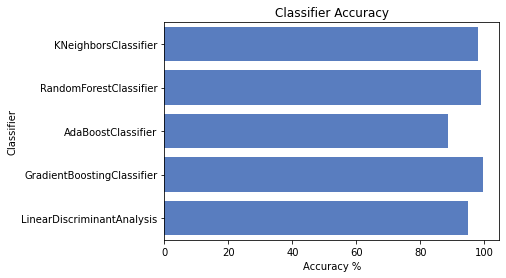

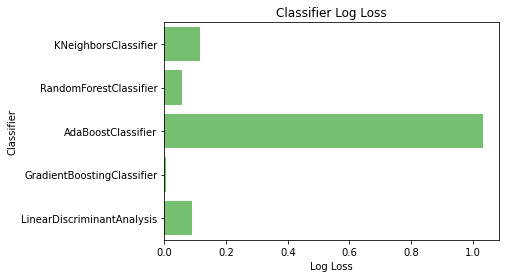

In [75]:

classifiers = [
    KNeighborsClassifier(3),
#     SVC(kernel="rbf", C=1, probability=True),
    #NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=20, random_state=0),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    target_names = ['class 0', 'class 1', 'class 2','class 3']
    print(classification_report(y_test, train_predictions, target_names=target_names))
    print('Kappa Score:',cohen_kappa_score(y_test, train_predictions))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)




sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [76]:
len(labels)

9400

In [77]:
fdf['labels']=pd.Series(labels)
fdf

,interests,regions,final,labels
0,"hobbies and activities,technology,vehicles,ent...",middle east,"hobbies and activities,technology,vehicles,ent...",2
1,"entertainment,entertainment,food and drink,spo...","asia & pacific,asia & pacific,asia & pacific,m...","entertainment,entertainment,food and drink,spo...",0
2,"hobbies and activities,sports,entertainment,sh...",asia & pacific,"hobbies and activities,sports,entertainment,sh...",2
3,"entertainment,entertainment,entertainment","middle east,middle east","entertainment,entertainment,entertainment,midd...",2
4,"hobbies and activities,hobbies and activities,...",asia & pacific,"hobbies and activities,hobbies and activities,...",2
...,...,...,...,...
9395,"family and relationship,entertainment,entertai...","asia & pacific,asia & pacific","family and relationship,entertainment,entertai...",2
9396,"entertainment,entertainment,entertainment,ente...","arab states,asia & pacific,middle east,europe,...","entertainment,entertainment,entertainment,ente...",2
9397,"entertainment,sports,sports,sports",asia & pacific,"entertainment,sports,sports,sports,asia & pacific",2
9398,"entertainment,entertainment,entertainment,ente...",middle east,"entertainment,entertainment,entertainment,ente...",2


In [78]:
cluster0=fdf[fdf['labels']==0]
cluster1=fdf[fdf['labels']==1]
cluster2=fdf[fdf['labels']==2]
cluster3=fdf[fdf['labels']==3]

In [79]:
cluster0.to_csv('our_data/cluster0.csv',index=False)
cluster0

,interests,regions,final,labels
1,"entertainment,entertainment,food and drink,spo...","asia & pacific,asia & pacific,asia & pacific,m...","entertainment,entertainment,food and drink,spo...",0
30,"entertainment,entertainment,entertainment","asia & pacific,asia & pacific,asia & pacific,m...","entertainment,entertainment,entertainment,asia...",0
38,"hobbies and activities,hobbies and activities,...","asia & pacific,asia & pacific,middle east,euro...","hobbies and activities,hobbies and activities,...",0
39,"entertainment,business and industry,hobbies an...","asia & pacific,asia & pacific,asia & pacific,a...","entertainment,business and industry,hobbies an...",0
40,"entertainment,entertainment,entertainment","asia & pacific,asia & pacific,middle east,asia...","entertainment,entertainment,entertainment,asia...",0
...,...,...,...,...
9373,"sports,entertainment,family and relationship,e...","europe,asia & pacific,asia & pacific,asia & pa...","sports,entertainment,family and relationship,e...",0
9383,"sports,entertainment,sports,fitness and wellness","asia & pacific,asia & pacific,asia & pacific,a...","sports,entertainment,sports,fitness and wellne...",0
9390,"entertainment,business and industry,entertainm...","asia & pacific,asia & pacific,asia & pacific,m...","entertainment,business and industry,entertainm...",0
9391,"entertainment,sports,entertainment,sports,spor...","europe,middle east,asia & pacific,asia & pacif...","entertainment,sports,entertainment,sports,spor...",0


In [80]:
cluster1.to_csv('our_data/cluster1.csv',index=False)
cluster1

,interests,regions,final,labels
7,"shopping and fashion,entertainment,entertainme...","asia & pacific,europe,europe,europe,europe,asi...","shopping and fashion,entertainment,entertainme...",1
18,"entertainment,entertainment,sports,sports","europe,europe,europe,europe,europe,europe,midd...","entertainment,entertainment,sports,sports,euro...",1
22,"entertainment,entertainment","europe,north america,middle east,europe,europe...","entertainment,entertainment,europe,north ameri...",1
42,"entertainment,entertainment,entertainment,sports","asia & pacific,europe,asia & pacific,europe,eu...","entertainment,entertainment,entertainment,spor...",1
56,"sports,sports,sports","europe,europe,europe,asia & pacific,africa,eur...","sports,sports,sports,europe,europe,europe,asia...",1
...,...,...,...,...
9349,"family and relationship,sports,entertainment,e...","asia & pacific,asia & pacific,europe,europe,mi...","family and relationship,sports,entertainment,e...",1
9356,"entertainment,sports,sports,entertainment","europe,europe,europe,europe,europe,europe,midd...","entertainment,sports,sports,entertainment,euro...",1
9369,"food and drink,entertainment,entertainment","europe,europe,europe,asia & pacific,europe,mid...","food and drink,entertainment,entertainment,eur...",1
9386,"sports,sports,food and drink","europe,middle east,europe,europe,asia & pacifi...","sports,sports,food and drink,europe,middle eas...",1


In [81]:
cluster2.to_csv('our_data/cluster2.csv',index=False)
cluster2

,interests,regions,final,labels
0,"hobbies and activities,technology,vehicles,ent...",middle east,"hobbies and activities,technology,vehicles,ent...",2
2,"hobbies and activities,sports,entertainment,sh...",asia & pacific,"hobbies and activities,sports,entertainment,sh...",2
3,"entertainment,entertainment,entertainment","middle east,middle east","entertainment,entertainment,entertainment,midd...",2
4,"hobbies and activities,hobbies and activities,...",asia & pacific,"hobbies and activities,hobbies and activities,...",2
5,"entertainment,entertainment,shopping and fashi...","asia & pacific,asia & pacific,europe,middle ea...","entertainment,entertainment,shopping and fashi...",2
...,...,...,...,...
9395,"family and relationship,entertainment,entertai...","asia & pacific,asia & pacific","family and relationship,entertainment,entertai...",2
9396,"entertainment,entertainment,entertainment,ente...","arab states,asia & pacific,middle east,europe,...","entertainment,entertainment,entertainment,ente...",2
9397,"entertainment,sports,sports,sports",asia & pacific,"entertainment,sports,sports,sports,asia & pacific",2
9398,"entertainment,entertainment,entertainment,ente...",middle east,"entertainment,entertainment,entertainment,ente...",2


In [82]:
cluster3.to_csv('our_data/cluster3.csv',index=False)
cluster3

,interests,regions,final,labels
12,"business and industry,sports,business and indu...","europe,middle east,europe,europe,europe,asia &...","business and industry,sports,business and indu...",3
15,"entertainment,entertainment,sports,family and ...","asia & pacific,europe,europe,europe,europe,asi...","entertainment,entertainment,sports,family and ...",3
57,"entertainment,entertainment,shopping and fashi...","north america,asia & pacific,europe,europe,eur...","entertainment,entertainment,shopping and fashi...",3
87,"entertainment,entertainment,entertainment","europe,asia & pacific,asia & pacific,europe,eu...","entertainment,entertainment,entertainment,euro...",3
95,"food and drink,entertainment,entertainment,ent...","europe,europe,middle east,europe,asia & pacifi...","food and drink,entertainment,entertainment,ent...",3
...,...,...,...,...
8423,"entertainment,business and industry","arab states,arab states,europe,asia & pacific,...","entertainment,business and industry,arab state...",3
8426,"food and drink,sports,shopping and fashion,ent...","europe,europe,north america,asia & pacific,eur...","food and drink,sports,shopping and fashion,ent...",3
9224,"entertainment,business and industry,entertainment","europe,europe,europe,europe,europe,europe,euro...","entertainment,business and industry,entertainm...",3
9302,"hobbies and activities,technology,family and r...","asia & pacific,arab states,south/latin america...","hobbies and activities,technology,family and r...",3


In [83]:
# from pyclustering.cluster import cluster_visualizer
# from pyclustering.cluster.xmeans import xmeans
# from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
# from pyclustering.utils import read_sample
# from pyclustering.samples.definitions import SIMPLE_SAMPLES
# # Read sample 'simple3' from file.
# sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
# # Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# # start analysis.
# amount_initial_centers = 4
# initial_centers = kmeans_plusplus_initializer(X, amount_initial_centers).initialize()
# # Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# # number of clusters that can be allocated is 20.
# xmeans_instance = xmeans(X, initial_centers, 18)
# xmeans_instance.process()
# # Extract clustering results: clusters and their centers
# clusters = xmeans_instance.get_clusters()
# centers = xmeans_instance.get_centers()
# # Visualize clustering results
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(centers, None, marker='*', markersize=10)
# visualizer.show()